In [2]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [3]:
sns.set_context('notebook') # optimise figures for notebook display
sns.set_style('ticks') # set default plot style
colours = ['#1F77B4','#FF7F0E','#2CA02C','#DB2728','#9467BD','#8C564B','#E377C2','#7F7F7F','#BCBD22','#17BECF']
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F','#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(colours) # set custom color scheme
%matplotlib inline
plt.rcParams['figure.figsize'] = (9,6)

In [4]:
train = pd.read_csv('train.csv')
train.head()

,Train_ID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,60,RL,88.0,12128,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,MnPrv,NaN,0,11,2006,WD,Abnorml,209000
1,2,120,RL,48.0,6240,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2009,WD,Normal,254000
2,3,50,RL,120.0,17360,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,172500
3,4,20,RL,73.0,8688,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,232000
4,5,80,RL,88.0,15312,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2009,COD,Normal,148000


In [5]:
train.shape

(1570, 81)

In [6]:
test = pd.read_csv('test.csv')
pd.set_option('display.max_columns', None)
test.head()

,Test_ID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,1,80,RL,120.0,19296,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,SLvl,6,5,1962,1962,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,399.0,TA,TA,CBlock,TA,TA,Gd,Rec,672,ALQ,690,0,1362,GasA,TA,Y,SBrkr,1382,0,0,1382,1.0,0.0,1,0,3,1,TA,6,Typ,1,TA,Attchd,1991.0,Unf,2.0,884.0,TA,TA,Y,0,0,252,0,0,0,NaN,GdWo,NaN,0,5,2009,WD,Normal
1,2,20,RL,80.0,10928,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1986,Gable,CompShg,VinylSd,VinylSd,BrkFace,101.0,TA,TA,PConc,TA,TA,No,LwQ,363,Unf,0,1064,1427,GasA,TA,Y,SBrkr,1671,0,0,1671,0.0,0.0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1978.0,RFn,2.0,484.0,TA,TA,Y,252,55,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
2,3,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2.0,440.0,TA,TA,Y,87,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
3,4,20,RL,60.0,8428,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,7,1994,1994,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,PConc,Gd,Gd,No,GLQ,420,Unf,0,570,990,GasA,Ex,Y,SBrkr,990,0,0,990,1.0,0.0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1995.0,Unf,1.0,384.0,TA,TA,Y,256,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
4,5,50,RM,50.0,9140,Pave,NaN,Reg,HLS,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,6,5,1921,1975,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,BLQ,308,Unf,0,321,629,GasA,Fa,Y,SBrkr,727,380,0,1107,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1950.0,Unf,1.0,625.0,TA,TA,Y,0,56,0,0,200,0,NaN,MnPrv,NaN,0,4,2010,COD,Normal


In [7]:
test.shape

(1210, 80)

# Data Processing

##  Duplicates

In [8]:
# no duplicates
duplicate = train.duplicated(subset = None, keep = 'first')
duplicate.value_counts()

False    1570
dtype: int64

In [9]:
# no duplicates
duplicate = test.duplicated(subset = None, keep = 'first')
duplicate.value_counts()

False    1210
dtype: int64

##  Missing data

In [10]:
train_na_sum = pd.DataFrame(train.isna().sum(), columns = ['Null Count'])
train_dtypes = pd.DataFrame(train.dtypes, columns = ['Dtype'])
train_df_summary = train_na_sum.join(train_dtypes)
train_df_summary

,Null Count,Dtype
Train_ID,0,int64
MS SubClass,0,int64
MS Zoning,0,object
Lot Frontage,264,float64
Lot Area,0,int64
...,...,...
Mo Sold,0,int64
Yr Sold,0,int64
Sale Type,0,object
Sale Condition,0,object


In [11]:
train_df_summary['Dtype'].value_counts()

object     43
int64      29
float64     9
Name: Dtype, dtype: int64

In [12]:
# how many columns have NA
train_column_NA = train.columns[train.isna().any()].tolist()
print(train_column_NA)
len(train_column_NA)

['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']


24

In [13]:
# how many columns have NA
test_column_NA = test.columns[test.isna().any()].tolist()
print(test_column_NA)
len(test_column_NA)

['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence', 'Misc Feature']


23

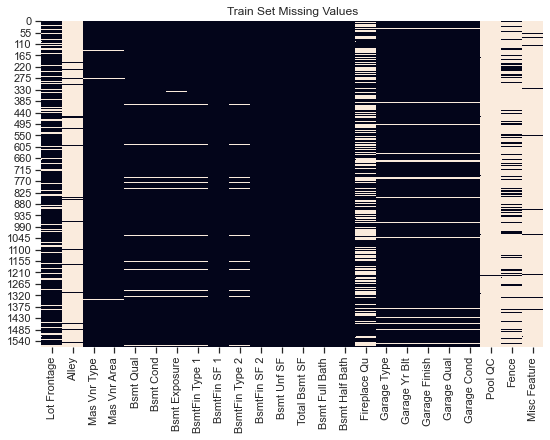

In [13]:
plt.rcParams['figure.figsize'] = (9,6)
sns.heatmap(train[train_column_NA].isnull(), cbar=False)
plt.title("Train Set Missing Values") 
plt.show()

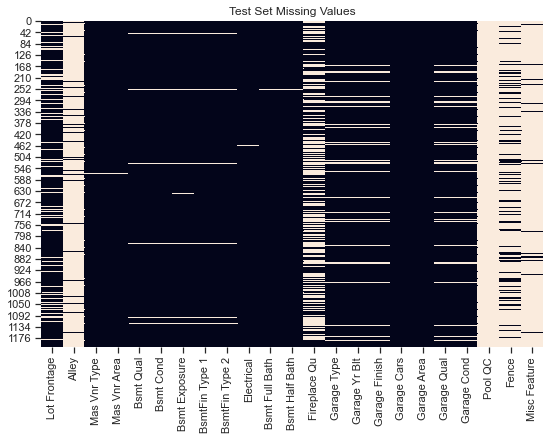

In [14]:
plt.rcParams['figure.figsize'] = (9,6)
sns.heatmap(test[test_column_NA].isnull(), cbar=False)
plt.title("Test Set Missing Values") 
plt.show()

In [14]:
# train
train_numerical_cols = [cname for cname in train.columns 
                        if train[cname].dtype in ['int64', 'float64']]

train_categorical_cols = [cname for cname in train.columns 
                          if train[cname].nunique() < 100
                          and train[cname].dtype in ['object', 'bool']]

numerical_transformer = SimpleImputer(strategy='constant') # fill NA with 0

categorical_transformer = SimpleImputer(strategy='most_frequent') # fill NA with mode

train_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, train_numerical_cols),
        ('cat', categorical_transformer, train_categorical_cols)
])

train_processed = train_preprocessor.fit_transform(train)

train_processed = pd.DataFrame(train_processed, columns = train_numerical_cols+train_categorical_cols)
train_processed.head()

,Train_ID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,1,60,88,12128,6,4,1989,1989,232,549,0,319,868,1313,1246,0,2559,0,0,2,1,4,1,9,1,1989,2,506,0,245,0,0,168,0,0,11,2006,209000,RL,Pave,Grvl,IR1,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,RFn,TA,TA,Y,Ex,MnPrv,Shed,WD,Abnorml
1,2,120,48,6240,8,5,2006,2006,176,863,0,461,1324,1324,0,0,1324,1,0,2,0,2,1,6,1,2006,2,550,192,38,0,0,0,0,0,12,2009,254000,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,Hip,CompShg,MetalSd,MetalSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
2,3,50,120,17360,6,6,1949,1950,340,300,0,482,782,1019,537,0,1556,0,0,2,0,3,1,6,1,1949,2,470,0,0,150,0,0,0,0,1,2010,172500,RL,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,Stone,TA,Gd,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
3,4,20,73,8688,7,5,2005,2005,228,0,0,1616,1616,1616,0,0,1616,0,0,2,0,3,1,7,0,2005,3,834,208,59,0,0,0,0,0,4,2006,232000,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
4,5,80,88,15312,6,5,1960,1960,54,588,0,550,1138,1138,0,0,1138,0,1,1,0,3,1,6,1,1960,2,480,0,0,0,0,140,0,0,3,2009,148000,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,Av,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Ex,MnPrv,Shed,COD,Normal


In [15]:
# how many columns have NA
print(len(train_processed.columns[train_processed.isna().any()].tolist()))

0


In [16]:
train_processed[train_numerical_cols] = train_processed[train_numerical_cols].apply(pd.to_numeric)
train_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Train_ID         1570 non-null   float64
 1   MS SubClass      1570 non-null   float64
 2   Lot Frontage     1570 non-null   float64
 3   Lot Area         1570 non-null   float64
 4   Overall Qual     1570 non-null   float64
 5   Overall Cond     1570 non-null   float64
 6   Year Built       1570 non-null   float64
 7   Year Remod/Add   1570 non-null   float64
 8   Mas Vnr Area     1570 non-null   float64
 9   BsmtFin SF 1     1570 non-null   float64
 10  BsmtFin SF 2     1570 non-null   float64
 11  Bsmt Unf SF      1570 non-null   float64
 12  Total Bsmt SF    1570 non-null   float64
 13  1st Flr SF       1570 non-null   float64
 14  2nd Flr SF       1570 non-null   float64
 15  Low Qual Fin SF  1570 non-null   float64
 16  Gr Liv Area      1570 non-null   float64
 17  Bsmt Full Bath

In [17]:
# test
test_numerical_cols = [cname for cname in test.columns 
                       if test[cname].dtype in ['int64', 'float64']]

test_categorical_cols = [cname for cname in test.columns 
                         if test[cname].nunique() < 100
                         and test[cname].dtype in ['object', 'bool']]

numerical_transformer = SimpleImputer(strategy='constant') # fill NA with 0

categorical_transformer = SimpleImputer(strategy='most_frequent') # fill NA with mode

test_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, test_numerical_cols),
        ('cat', categorical_transformer, test_categorical_cols)
])

test_processed = test_preprocessor.fit_transform(test)

test_processed = pd.DataFrame(test_processed, columns = test_numerical_cols+test_categorical_cols)
test_processed.head()

,Test_ID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,1,80,120,19296,6,5,1962,1962,399,672,690,0,1362,1382,0,0,1382,1,0,1,0,3,1,6,1,1991,2,884,0,0,252,0,0,0,0,5,2009,RL,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,SLvl,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,Gd,Rec,ALQ,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,Unf,TA,TA,Y,Gd,GdWo,Shed,WD,Normal
1,2,20,80,10928,6,6,1978,1986,101,363,0,1064,1427,1671,0,0,1671,0,0,2,0,3,1,7,1,1978,2,484,252,55,0,0,0,0,0,8,2009,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,LwQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,3,160,24,2280,6,6,1976,1976,0,566,0,289,855,855,601,0,1456,0,0,2,1,3,1,7,1,1976,2,440,87,0,0,0,0,0,0,7,2009,RL,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,Gable,CompShg,Plywood,Brk Cmn,None,TA,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,4,20,60,8428,5,7,1994,1994,0,420,0,570,990,990,0,0,990,1,0,1,0,3,1,5,0,1995,1,384,256,0,0,0,0,0,0,7,2007,RL,Pave,Grvl,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,PConc,Gd,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
4,5,50,50,9140,6,5,1921,1975,0,308,0,321,629,727,380,0,1107,0,0,1,0,2,1,5,0,1950,1,625,0,56,0,0,200,0,0,4,2010,RM,Pave,Grvl,Reg,HLS,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,BrkTil,TA,TA,Mn,BLQ,Unf,GasA,Fa,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,COD,Normal


In [18]:
# how many columns have NA
print(len(test_processed.columns[test_processed.isna().any()].tolist()))

0


In [19]:
test_processed[test_numerical_cols] = test_processed[test_numerical_cols].apply(pd.to_numeric)
test_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Test_ID          1210 non-null   float64
 1   MS SubClass      1210 non-null   float64
 2   Lot Frontage     1210 non-null   float64
 3   Lot Area         1210 non-null   float64
 4   Overall Qual     1210 non-null   float64
 5   Overall Cond     1210 non-null   float64
 6   Year Built       1210 non-null   float64
 7   Year Remod/Add   1210 non-null   float64
 8   Mas Vnr Area     1210 non-null   float64
 9   BsmtFin SF 1     1210 non-null   float64
 10  BsmtFin SF 2     1210 non-null   float64
 11  Bsmt Unf SF      1210 non-null   float64
 12  Total Bsmt SF    1210 non-null   float64
 13  1st Flr SF       1210 non-null   float64
 14  2nd Flr SF       1210 non-null   float64
 15  Low Qual Fin SF  1210 non-null   float64
 16  Gr Liv Area      1210 non-null   float64
 17  Bsmt Full Bath

# EDA

In [19]:
descriptive = train_processed[train_numerical_cols].describe()
descriptive.loc['var', :] = train_processed.var()
descriptive.loc['kurt', :] = train_processed.kurt()
descriptive.loc['skew', :] = train_processed.skew()
descriptive.round(4)

,Train_ID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0,1570.0
unique,1570.0,15.0,114.0,1164.0,10.0,9.0,109.0,61.0,329.0,680.0,165.0,821.0,760.0,812.0,445.0,22.0,922.0,4.0,3.0,5.0,3.0,7.0,3.0,12.0,5.0,98.0,6.0,459.0,284.0,206.0,128.0,19.0,76.0,9.0,24.0,12.0,5.0,702.0
top,1570.0,20.0,0.0,7200.0,5.0,5.0,2006.0,1950.0,0.0,0.0,0.0,0.0,0.0,864.0,0.0,0.0,864.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2007.0,140000.0
freq,1.0,579.0,264.0,25.0,453.0,891.0,68.0,182.0,941.0,498.0,1383.0,129.0,42.0,22.0,891.0,1549.0,19.0,906.0,1469.0,810.0,962.0,850.0,1498.0,432.0,749.0,83.0,859.0,82.0,830.0,680.0,1313.0,1550.0,1432.0,1562.0,1516.0,264.0,355.0,22.0
var,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
skew,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


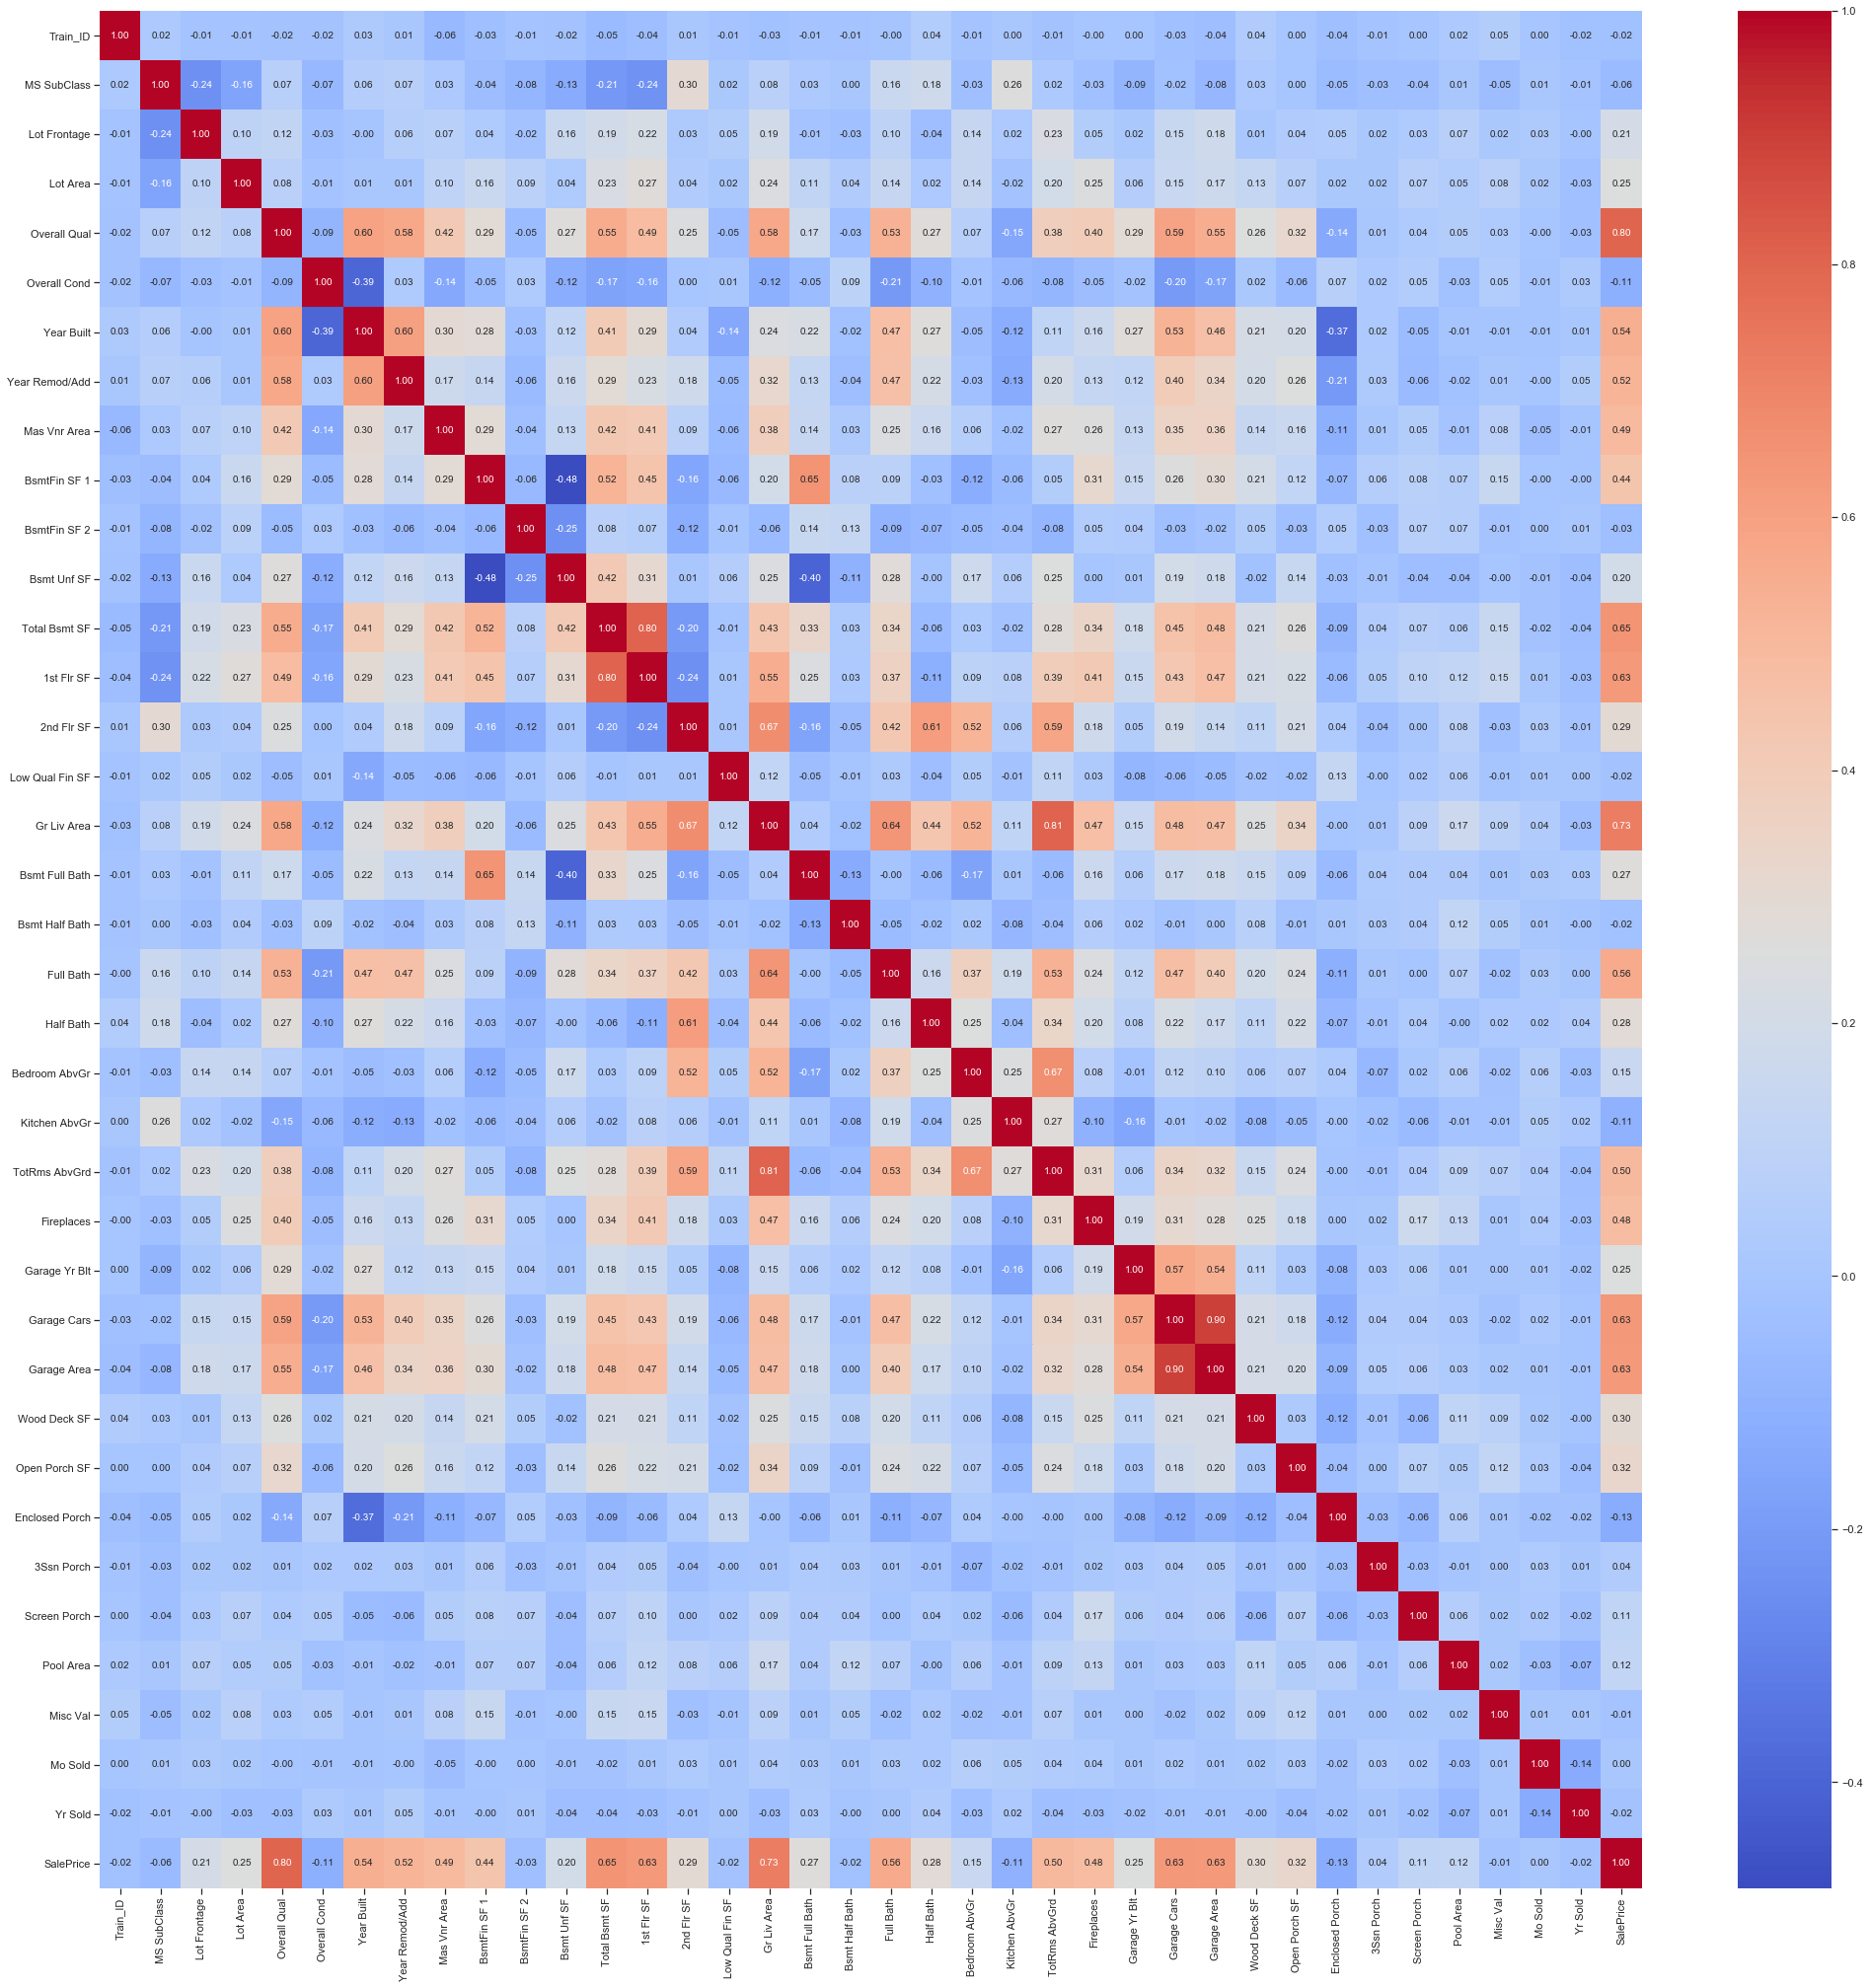

In [23]:
# heatmap
plt.rcParams['figure.figsize']=35,35
g = sns.heatmap(train_processed.corr(), annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

In [24]:
# sort correlation from large to small
corr = train_processed.corr().round(4)
corr['SalePrice'].abs().sort_values(ascending = False)

SalePrice          1.0000
Overall Qual       0.7977
Gr Liv Area        0.7257
Total Bsmt SF      0.6485
Garage Cars        0.6320
1st Flr SF         0.6288
Garage Area        0.6262
Full Bath          0.5614
Year Built         0.5425
Year Remod/Add     0.5216
TotRms AbvGrd      0.4999
Mas Vnr Area       0.4930
Fireplaces         0.4821
BsmtFin SF 1       0.4421
Open Porch SF      0.3249
Wood Deck SF       0.2952
2nd Flr SF         0.2949
Half Bath          0.2824
Bsmt Full Bath     0.2660
Lot Area           0.2538
Garage Yr Blt      0.2538
Lot Frontage       0.2089
Bsmt Unf SF        0.1995
Bedroom AbvGr      0.1536
Enclosed Porch     0.1270
Pool Area          0.1212
Overall Cond       0.1125
Screen Porch       0.1109
Kitchen AbvGr      0.1056
MS SubClass        0.0559
3Ssn Porch         0.0424
BsmtFin SF 2       0.0346
Train_ID           0.0236
Bsmt Half Bath     0.0214
Yr Sold            0.0195
Low Qual Fin SF    0.0174
Misc Val           0.0125
Mo Sold            0.0036
Name: SalePr

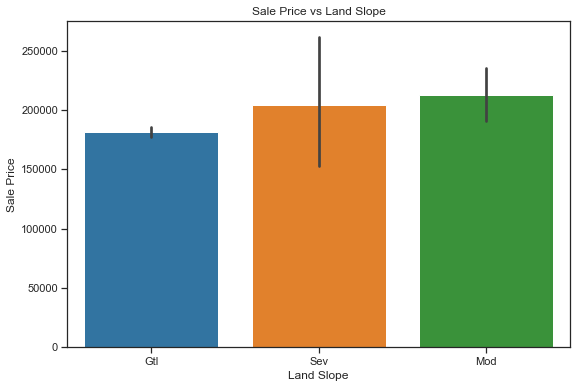

In [21]:
plt.rcParams['figure.figsize'] = (9,6)
sns.barplot(x='Land Slope', y='SalePrice', data=train_processed)
plt.xlabel("Land Slope")                
plt.ylabel("Sale Price")  
plt.title("Sale Price vs Land Slope") 
plt.show()

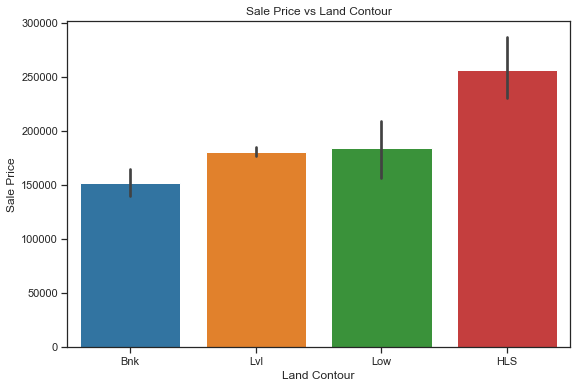

In [22]:
sns.barplot(x='Land Contour', y='SalePrice', data=train_processed)
plt.xlabel("Land Contour")                
plt.ylabel("Sale Price")  
plt.title("Sale Price vs Land Contour") 
plt.show()

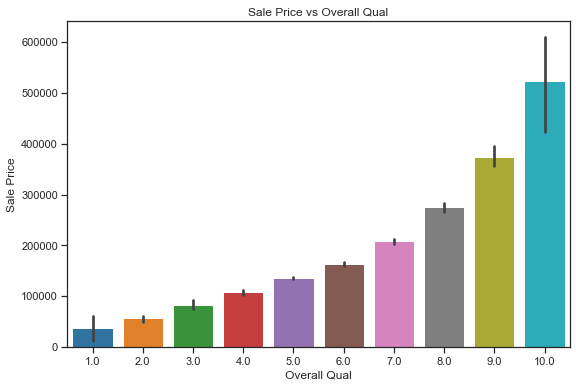

In [23]:
sns.barplot(x='Overall Qual', y='SalePrice', data=train_processed)
plt.xlabel("Overall Qual")                
plt.ylabel("Sale Price")  
plt.title("Sale Price vs Overall Qual") 
plt.show()

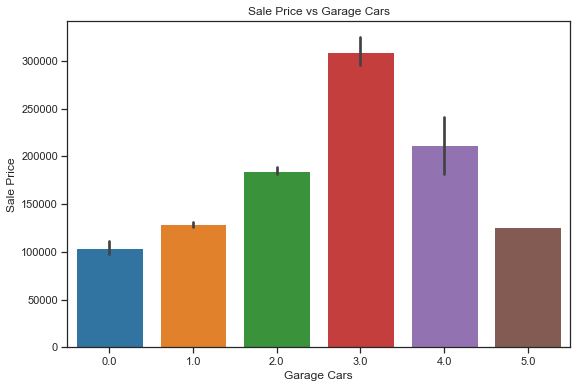

In [24]:
sns.barplot(x='Garage Cars', y='SalePrice', data=train_processed)
plt.xlabel("Garage Cars")                
plt.ylabel("Sale Price")  
plt.title("Sale Price vs Garage Cars") 
plt.show()

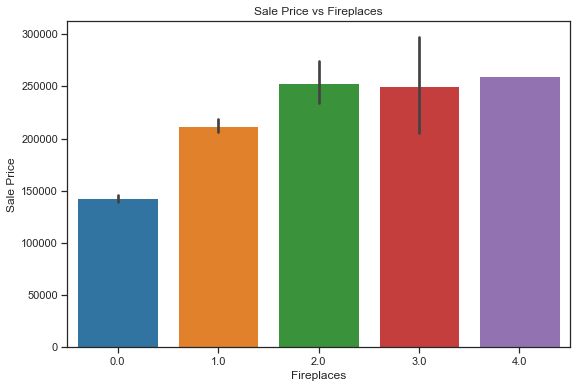

In [25]:
# 壁炉
sns.barplot(x='Fireplaces', y='SalePrice', data=train_processed)
plt.xlabel("Fireplaces")                
plt.ylabel("Sale Price")  
plt.title("Sale Price vs Fireplaces") 
plt.show()

D:\study\anaconda\install\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


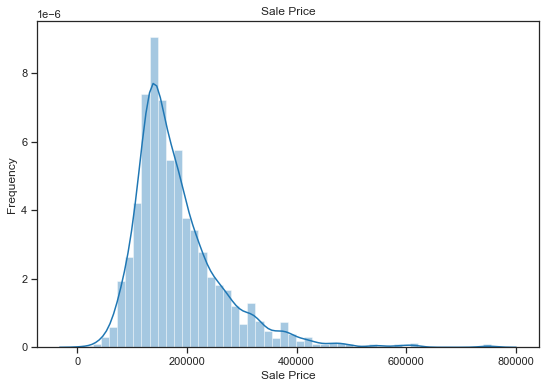

In [26]:
sns.distplot(train_processed['SalePrice'])
plt.xlabel("Sale Price")                
plt.ylabel("Frequency")  
plt.title("Sale Price") 
plt.show()

In [20]:
# scatter plot
from statlearning import plot_regressions
train_numerical_cols.remove('SalePrice') # remove price from numerical variable, as price should be dependent variable
train_numerical_cols.remove('Train_ID')

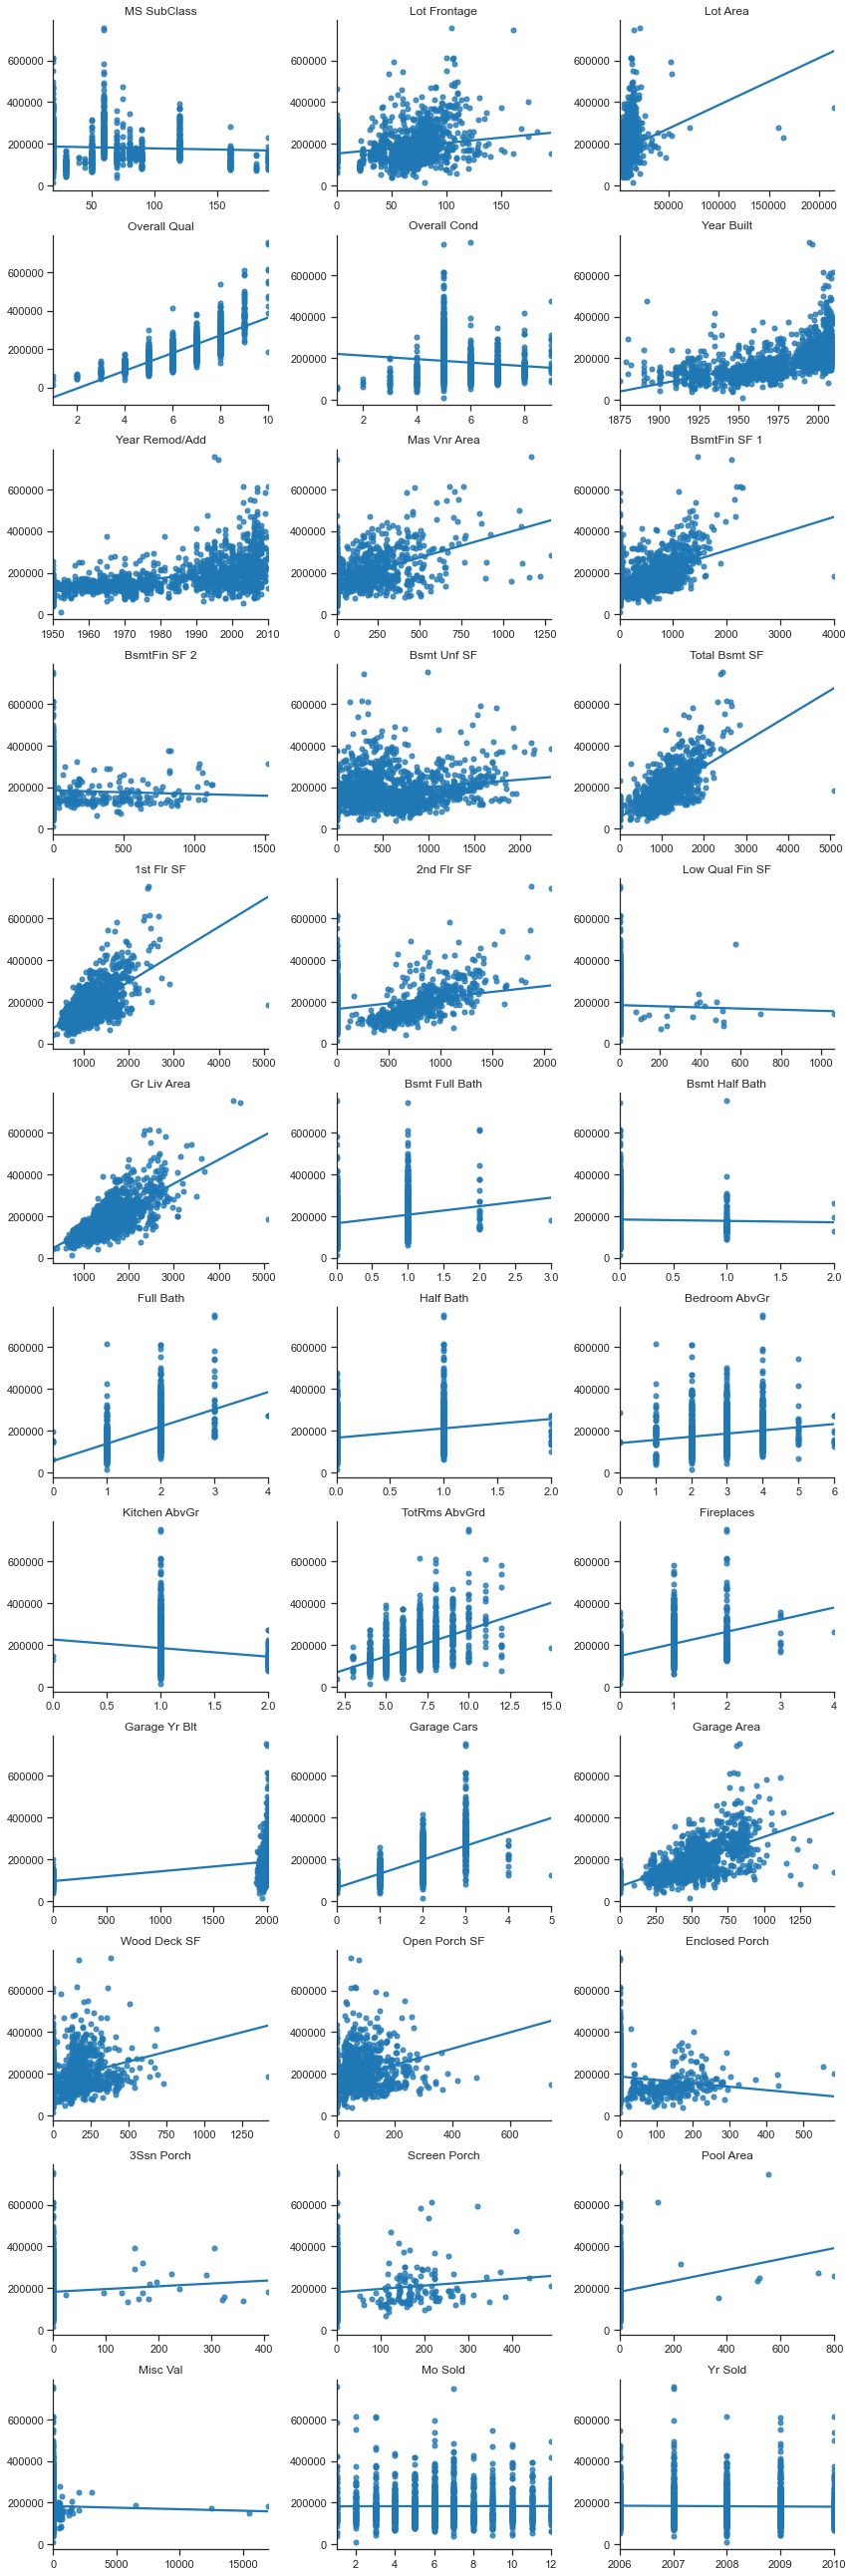

In [28]:
plot_regressions(train_processed[train_numerical_cols].astype('int32'), train_processed['SalePrice'].astype('int32'))
plt.show()

D:\study\anaconda\install\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\study\anaconda\install\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\study\anaconda\install\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(s

D:\study\anaconda\install\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\study\anaconda\install\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\study\anaconda\install\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(s

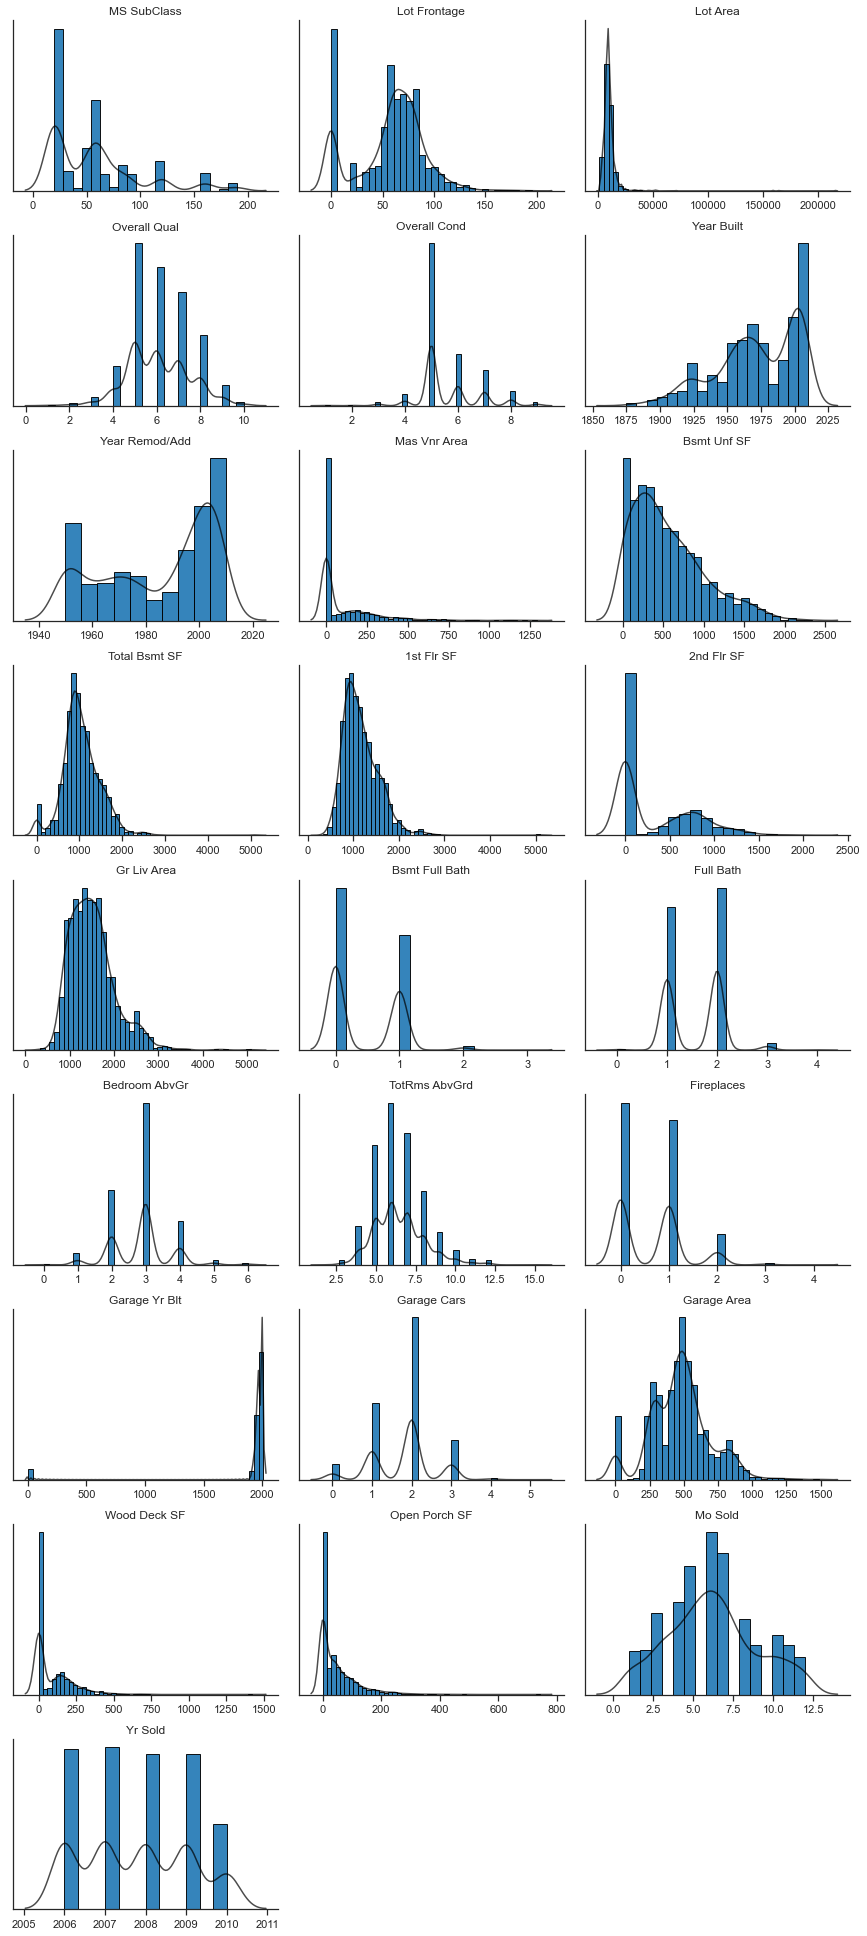

In [29]:
# distribution plot
from statlearning import plot_dists

train_numerical_cols_1 = ['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
 'Mas Vnr Area', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Full Bath',
 'Bedroom AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
 'Mo Sold', 'Yr Sold']

plot_dists(train_processed[train_numerical_cols_1])
plt.show()

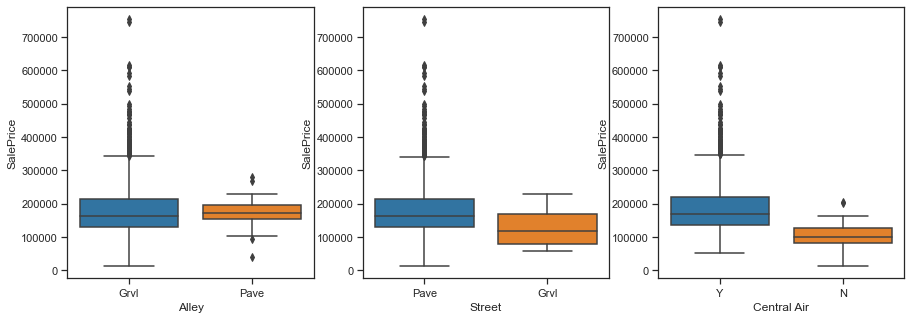

In [30]:
f, axes = plt.subplots(1,3,figsize=(15,5))
sns.boxplot(x=train_processed['Alley'],y=train_processed['SalePrice'],ax=axes[0])
sns.boxplot(x=train_processed['Street'],y=train_processed['SalePrice'],ax=axes[1])
sns.boxplot(x=train_processed['Central Air'],y=train_processed['SalePrice'],ax=axes[2])
plt.show()

# Feature Engineering

In [21]:
# Data overview
train_fe=train_processed.copy()
test_fe=test_processed.copy()
print(train_fe.columns)
train_fe.head()

Index(['Train_ID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice', 'MS Zoning',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt E

,Train_ID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,1.0,60.0,88.0,12128.0,6.0,4.0,1989.0,1989.0,232.0,549.0,0.0,319.0,868.0,1313.0,1246.0,0.0,2559.0,0.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,1989.0,2.0,506.0,0.0,245.0,0.0,0.0,168.0,0.0,0.0,11.0,2006.0,209000.0,RL,Pave,Grvl,IR1,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,TA,Attchd,RFn,TA,TA,Y,Ex,MnPrv,Shed,WD,Abnorml
1,2.0,120.0,48.0,6240.0,8.0,5.0,2006.0,2006.0,176.0,863.0,0.0,461.0,1324.0,1324.0,0.0,0.0,1324.0,1.0,0.0,2.0,0.0,2.0,1.0,6.0,1.0,2006.0,2.0,550.0,192.0,38.0,0.0,0.0,0.0,0.0,0.0,12.0,2009.0,254000.0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,Hip,CompShg,MetalSd,MetalSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
2,3.0,50.0,120.0,17360.0,6.0,6.0,1949.0,1950.0,340.0,300.0,0.0,482.0,782.0,1019.0,537.0,0.0,1556.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,1949.0,2.0,470.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,1.0,2010.0,172500.0,RL,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,Stone,TA,Gd,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
3,4.0,20.0,73.0,8688.0,7.0,5.0,2005.0,2005.0,228.0,0.0,0.0,1616.0,1616.0,1616.0,0.0,0.0,1616.0,0.0,0.0,2.0,0.0,3.0,1.0,7.0,0.0,2005.0,3.0,834.0,208.0,59.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,232000.0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
4,5.0,80.0,88.0,15312.0,6.0,5.0,1960.0,1960.0,54.0,588.0,0.0,550.0,1138.0,1138.0,0.0,0.0,1138.0,0.0,1.0,1.0,0.0,3.0,1.0,6.0,1.0,1960.0,2.0,480.0,0.0,0.0,0.0,0.0,140.0,0.0,0.0,3.0,2009.0,148000.0,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,Av,BLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Ex,MnPrv,Shed,COD,Normal


## Encoding for Category Variable

In [33]:
train_categorical_cols

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type',
 'Sale Condition']

In [22]:
category = ['Lot Shape','Land Contour','Utilities','Land Slope','Bldg Type','House Style','Mas Vnr Type',
            'Exter Qual','Exter Cond','Foundation','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1',
            'BsmtFin Type 2','Heating QC', 'Electrical','Kitchen Qual','Functional','Fireplace Qu','Garage Type',
            'Garage Finish','Garage Qual','Garage Cond','Paved Drive','Pool QC','Fence', # Ordinal
        
            'MS Zoning','Lot Config','Neighborhood','Condition 1','Condition 2','Roof Style','Roof Matl',
            'Exterior 1st','Exterior 2nd','Heating','Misc Feature','Sale Type','Sale Condition', # Category
            
            'Alley','Street','Central Air'] # Dummy

### Ordinal Data Encoding

In [24]:
ordinal = ['Lot Shape','Land Contour']

for i in range(len(ordinal)):
    print(train_fe[ordinal[i]].value_counts())
    print(' ')

Reg    1006
IR1     515
IR2      41
IR3       8
Name: Lot Shape, dtype: int64
 
Lvl    1400
HLS      70
Bnk      62
Low      38
Name: Land Contour, dtype: int64
 


In [27]:
for i in ordinal:
    print(train_fe[i].value_counts())
    print(' ')

0    1006
1     515
2      41
3       8
Name: Lot Shape, dtype: int64
 
0    1400
2      70
1      62
3      38
Name: Land Contour, dtype: int64
 


In [35]:
# Find ordinal category data in train data
print(train_fe['Lot Shape'].value_counts())
print(' ')

print(train_fe['Land Contour'].value_counts())
print(' ')

print(train_fe['Utilities'].value_counts()) 
print(' ')

print(train_fe['Land Slope'].value_counts())
print(' ')

print(train_fe['Bldg Type'].value_counts())
print(' ')

print(train_fe['House Style'].value_counts())
print(' ')

print(train_fe['Mas Vnr Type'].value_counts())
print(' ')

print(train_fe['Exter Qual'].value_counts())
print(' ')

print(train_fe['Exter Cond'].value_counts())
print(' ')

print(train_fe['Foundation'].value_counts())
print(' ')

print(train_fe['Bsmt Qual'].value_counts())
print(' ')

print(train_fe['Bsmt Cond'].value_counts())
print(' ')

print(train_fe['Bsmt Exposure'].value_counts())
print(' ')

print(train_fe['BsmtFin Type 1'].value_counts())
print(' ')

print(train_fe['BsmtFin Type 2'].value_counts())
print(' ')

print(train_fe['Heating QC'].value_counts())
print(' ')

print(train_fe['Electrical'].value_counts())
print(' ')

print(train_fe['Kitchen Qual'].value_counts())
print(' ')

print(train_fe['Functional'].value_counts())
print(' ')

print(train_fe['Fireplace Qu'].value_counts())
print(' ')

print(train_fe['Garage Type'].value_counts())
print(' ')

print(train_fe['Garage Finish'].value_counts())
print(' ')

print(train_fe['Garage Qual'].value_counts())
print(' ')

print(train_fe['Paved Drive'].value_counts())
print(' ')

print(train_fe['Pool QC'].value_counts())
print(' ')

print(train_fe['Fence'].value_counts())
print(' ')

Reg    1006
IR1     515
IR2      41
IR3       8
Name: Lot Shape, dtype: int64
 
Lvl    1400
HLS      70
Bnk      62
Low      38
Name: Land Contour, dtype: int64
 
AllPub    1568
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64
 
Gtl    1479
Mod      82
Sev       9
Name: Land Slope, dtype: int64
 
1Fam      1303
TwnhsE     129
Duplex      60
Twnhs       49
2fmCon      29
Name: Bldg Type, dtype: int64
 
1Story    787
2Story    478
1.5Fin    167
SLvl       71
SFoyer     46
2.5Unf     10
1.5Unf      6
2.5Fin      5
Name: House Style, dtype: int64
 
None       941
BrkFace    481
Stone      129
BrkCmn      19
Name: Mas Vnr Type, dtype: int64
 
TA    965
Gd    535
Ex     55
Fa     15
Name: Exter Qual, dtype: int64
 
TA    1371
Gd     153
Fa      38
Ex       6
Po       2
Name: Exter Cond, dtype: int64
 
PConc     711
CBlock    671
BrkTil    152
Slab       24
Stone       8
Wood        4
Name: Foundation, dtype: int64
 
TA    719
Gd    652
Ex    149
Fa     48
Po      2
Name: Bsmt Qual

In [36]:
# Find ordinal category data in test data
print(test_fe['Lot Shape'].value_counts())
print(' ')

print(test_fe['Land Contour'].value_counts())
print(' ')

print(test_fe['Utilities'].value_counts()) 
print(' ')

print(test_fe['Land Slope'].value_counts())
print(' ')

print(test_fe['Bldg Type'].value_counts())
print(' ')

print(test_fe['House Style'].value_counts())
print(' ')

print(test_fe['Mas Vnr Type'].value_counts())
print(' ')

print(test_fe['Exter Qual'].value_counts())
print(' ')

print(test_fe['Exter Cond'].value_counts())
print(' ')

print(test_fe['Foundation'].value_counts())
print(' ')

print(test_fe['Bsmt Qual'].value_counts())
print(' ')

print(test_fe['Bsmt Cond'].value_counts())
print(' ')

print(test_fe['Bsmt Exposure'].value_counts())
print(' ')

print(test_fe['BsmtFin Type 1'].value_counts())
print(' ')

print(test_fe['BsmtFin Type 2'].value_counts())
print(' ')

print(test_fe['Heating QC'].value_counts())
print(' ')

print(test_fe['Electrical'].value_counts())
print(' ')

print(test_fe['Kitchen Qual'].value_counts())
print(' ')

print(test_fe['Functional'].value_counts())
print(' ')

print(test_fe['Fireplace Qu'].value_counts())
print(' ')

print(test_fe['Garage Type'].value_counts())
print(' ')

print(test_fe['Garage Finish'].value_counts())
print(' ')

print(test_fe['Garage Qual'].value_counts())
print(' ')

print(test_fe['Paved Drive'].value_counts())
print(' ')

print(test_fe['Pool QC'].value_counts())
print(' ')

print(test_fe['Fence'].value_counts())
print(' ')

Reg    751
IR1    418
IR2     33
IR3      8
Name: Lot Shape, dtype: int64
 
Lvl    1094
Bnk      48
HLS      47
Low      21
Name: Land Contour, dtype: int64
 
AllPub    1209
NoSewr       1
Name: Utilities, dtype: int64
 
Gtl    1164
Mod      39
Sev       7
Name: Land Slope, dtype: int64
 
1Fam      998
TwnhsE     96
Twnhs      47
Duplex     41
2fmCon     28
Name: Bldg Type, dtype: int64
 
1Story    621
2Story    352
1.5Fin    127
SLvl       50
SFoyer     33
1.5Unf     13
2.5Unf     11
2.5Fin      3
Name: House Style, dtype: int64
 
None       740
BrkFace    358
Stone      106
BrkCmn       6
Name: Mas Vnr Type, dtype: int64
 
TA    731
Gd    413
Ex     48
Fa     18
Name: Exter Qual, dtype: int64
 
TA    1050
Gd     127
Fa      26
Ex       6
Po       1
Name: Exter Cond, dtype: int64
 
PConc     543
CBlock    509
BrkTil    134
Slab       20
Stone       3
Wood        1
Name: Foundation, dtype: int64
 
TA    565
Gd    509
Ex    100
Fa     36
Name: Bsmt Qual, dtype: int64
 
TA    1104
Gd    

In [25]:
# Encode ordinal category for train data
train_fe['Lot Shape'] = train_fe['Lot Shape'].map({'IR3':3,'IR2':2,'IR1':1,'Reg':0})

train_fe['Land Contour'] = train_fe['Land Contour'].map({'Low':3,'HLS':2,'Bnk':1,'Lvl':0})

train_fe['Utilities'] = train_fe['Utilities'].map({'NoSeWa':2,'NoSewr':1,'AllPub':0})

train_fe['Land Slope'] = train_fe['Land Slope'].map({'Sev':2,'Mod':1,'Gtl':0})

train_fe['Bldg Type'] = train_fe['Bldg Type'].map({'Twnhs':4,'TwnhsE':3,'Duplex':2,'2fmCon':1,'1Fam':0})

train_fe['House Style'] = train_fe['House Style'].map({'SLvl':7,'SFoyer':6,'2.5Unf':5,'2.5Fin':4,'2Story':3,
                                                       '1.5Unf':2,'1.5Fin':1,'1Story':0})

train_fe['Mas Vnr Type'] = train_fe['Mas Vnr Type'].map({'BrkCmn':3,'BrkFace':2,'Stone':1,'None':0})

train_fe['Exter Qual'] = train_fe['Exter Qual'].map({'Ex':3,'Gd':2,'TA':1,'Fa':0})

train_fe['Exter Cond'] = train_fe['Exter Cond'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

train_fe['Foundation'] = train_fe['Foundation'].map({'BrkTil':5,'CBlock':4,'PConc':3,'Slab':2,'Stone':1,'Wood':0})

train_fe['Bsmt Qual'] = train_fe['Bsmt Qual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

train_fe['Bsmt Cond'] = train_fe['Bsmt Cond'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

train_fe['Bsmt Exposure'] = train_fe['Bsmt Exposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0})

train_fe['BsmtFin Type 1'] = train_fe['BsmtFin Type 1'].map({'GLQ':5,'ALQ':4,'BLQ':3,'Rec':2,'LwQ':1,'Unf':0})

train_fe['BsmtFin Type 2'] = train_fe['BsmtFin Type 2'].map({'GLQ':5,'ALQ':4,'BLQ':3,'Rec':2,'LwQ':1,'Unf':0})

train_fe['Heating QC'] = train_fe['Heating QC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

train_fe['Electrical'] = train_fe['Electrical'].map({'Mix':4,'FuseP':3,'FuseF':2,'FuseA':1,'SBrkr':0})

train_fe['Kitchen Qual'] = train_fe['Kitchen Qual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

train_fe['Functional'] = train_fe['Functional'].map({'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,
                                                       'Maj2':2,'Sev':1,'Sal':0})

train_fe['Fireplace Qu'] = train_fe['Fireplace Qu'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

train_fe['Garage Type'] = train_fe['Garage Type'].map({'2Types':5,'Attchd':4,'Basment':3,'BuiltIn':2,'CarPort':1,'Detchd':0})

train_fe['Garage Finish'] = train_fe['Garage Finish'].map({'Fin':2,'RFn':1,'Unf':0})

train_fe['Garage Qual'] = train_fe['Garage Qual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

train_fe['Paved Drive'] = train_fe['Paved Drive'].map({'Y':2,'P':1,'N':0})

train_fe['Pool QC'] = train_fe['Pool QC'].map({'Ex':3,'Gd':2,'TA':1,'Fa':0})

train_fe['Fence'] = train_fe['Fence'].map({'GdPrv':3,'MnPrv':2,'GdWo':1,'MnWw':0})

train_fe.head()

,Train_ID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,1.0,60.0,88.0,12128.0,6.0,4.0,1989.0,1989.0,232.0,549.0,0.0,319.0,868.0,1313.0,1246.0,0.0,2559.0,0.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,1989.0,2.0,506.0,0.0,245.0,0.0,0.0,168.0,0.0,0.0,11.0,2006.0,209000.0,RL,Pave,Grvl,1,1,0,Inside,0,SawyerW,Norm,Norm,0,3,Gable,CompShg,HdBoard,HdBoard,2,2,2,4,3,2,0,4,0,GasA,4,Y,0,4,7,2,4,1,2,TA,2,3,2,Shed,WD,Abnorml
1,2.0,120.0,48.0,6240.0,8.0,5.0,2006.0,2006.0,176.0,863.0,0.0,461.0,1324.0,1324.0,0.0,0.0,1324.0,1.0,0.0,2.0,0.0,2.0,1.0,6.0,1.0,2006.0,2.0,550.0,192.0,38.0,0.0,0.0,0.0,0.0,0.0,12.0,2009.0,254000.0,RL,Pave,Grvl,0,0,0,Inside,0,NridgHt,Norm,Norm,3,0,Hip,CompShg,MetalSd,MetalSd,2,2,2,3,3,2,0,5,0,GasA,4,Y,0,3,7,3,4,2,2,TA,2,3,2,Shed,WD,Normal
2,3.0,50.0,120.0,17360.0,6.0,6.0,1949.0,1950.0,340.0,300.0,0.0,482.0,782.0,1019.0,537.0,0.0,1556.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,1949.0,2.0,470.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,1.0,2010.0,172500.0,RL,Pave,Grvl,0,0,0,Corner,0,NAmes,Artery,Norm,0,1,Gable,CompShg,MetalSd,MetalSd,1,1,3,4,2,2,0,2,0,GasA,2,Y,0,2,7,3,4,0,2,TA,2,3,2,Shed,WD,Normal
3,4.0,20.0,73.0,8688.0,7.0,5.0,2005.0,2005.0,228.0,0.0,0.0,1616.0,1616.0,1616.0,0.0,0.0,1616.0,0.0,0.0,2.0,0.0,3.0,1.0,7.0,0.0,2005.0,3.0,834.0,208.0,59.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,232000.0,RL,Pave,Grvl,0,0,0,Inside,0,Somerst,Norm,Norm,0,0,Gable,CompShg,VinylSd,VinylSd,2,2,2,3,3,2,2,0,0,GasA,4,Y,0,3,7,3,4,1,2,TA,2,3,2,Shed,WD,Normal
4,5.0,80.0,88.0,15312.0,6.0,5.0,1960.0,1960.0,54.0,588.0,0.0,550.0,1138.0,1138.0,0.0,0.0,1138.0,0.0,1.0,1.0,0.0,3.0,1.0,6.0,1.0,1960.0,2.0,480.0,0.0,0.0,0.0,0.0,140.0,0.0,0.0,3.0,2009.0,148000.0,RL,Pave,Grvl,0,0,0,Inside,0,Sawyer,Norm,Norm,0,7,Hip,CompShg,Wd Sdng,Wd Sdng,2,1,2,4,2,2,2,3,0,GasA,4,Y,0,2,7,2,4,1,2,TA,2,3,2,Shed,COD,Normal


In [26]:
# Encode ordinal category for test data
test_fe['Lot Shape'] = test_fe['Lot Shape'].map({'IR3':3,'IR2':2,'IR1':1,'Reg':0})

test_fe['Land Contour'] = test_fe['Land Contour'].map({'Low':3,'HLS':2,'Bnk':1,'Lvl':0})

test_fe['Utilities'] = test_fe['Utilities'].map({'NoSeWa':2,'NoSewr':1,'AllPub':0})

test_fe['Land Slope'] = test_fe['Land Slope'].map({'Sev':2,'Mod':1,'Gtl':0})

test_fe['Bldg Type'] = test_fe['Bldg Type'].map({'Twnhs':4,'TwnhsE':3,'Duplex':2,'2fmCon':1,'1Fam':0})

test_fe['House Style'] = test_fe['House Style'].map({'SLvl':7,'SFoyer':6,'2.5Unf':5,'2.5Fin':4,'2Story':3,
                                                       '1.5Unf':2,'1.5Fin':1,'1Story':0})

test_fe['Mas Vnr Type'] = test_fe['Mas Vnr Type'].map({'BrkCmn':3,'BrkFace':2,'Stone':1,'None':0})

test_fe['Exter Qual'] = test_fe['Exter Qual'].map({'Ex':3,'Gd':2,'TA':1,'Fa':0})

test_fe['Exter Cond'] = test_fe['Exter Cond'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

test_fe['Foundation'] = test_fe['Foundation'].map({'BrkTil':5,'CBlock':4,'PConc':3,'Slab':2,'Stone':1,'Wood':0})

test_fe['Bsmt Qual'] = test_fe['Bsmt Qual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

test_fe['Bsmt Cond'] = test_fe['Bsmt Cond'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

test_fe['Bsmt Exposure'] = test_fe['Bsmt Exposure'].map({'Gd':3,'Av':2,'Mn':1,'No':0})

test_fe['BsmtFin Type 1'] = test_fe['BsmtFin Type 1'].map({'GLQ':5,'ALQ':4,'BLQ':3,'Rec':2,'LwQ':1,'Unf':0})

test_fe['BsmtFin Type 2'] = test_fe['BsmtFin Type 2'].map({'GLQ':5,'ALQ':4,'BLQ':3,'Rec':2,'LwQ':1,'Unf':0})

test_fe['Heating QC'] = test_fe['Heating QC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

test_fe['Electrical'] = test_fe['Electrical'].map({'Mix':4,'FuseP':3,'FuseF':2,'FuseA':1,'SBrkr':0})

test_fe['Kitchen Qual'] = test_fe['Kitchen Qual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

test_fe['Functional'] = test_fe['Functional'].map({'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,
                                                       'Maj2':2,'Sev':1,'Sal':0})

test_fe['Fireplace Qu'] = test_fe['Fireplace Qu'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

test_fe['Garage Type'] = test_fe['Garage Type'].map({'2Types':5,'Attchd':4,'Basment':3,'BuiltIn':2,'CarPort':1,'Detchd':0})

test_fe['Garage Finish'] = test_fe['Garage Finish'].map({'Fin':2,'RFn':1,'Unf':0})

test_fe['Garage Qual'] = test_fe['Garage Qual'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'Po':0})

test_fe['Paved Drive'] = test_fe['Paved Drive'].map({'Y':2,'P':1,'N':0})

test_fe['Pool QC'] = test_fe['Pool QC'].map({'Ex':3,'Gd':2,'TA':1,'Fa':0})

test_fe['Fence'] = test_fe['Fence'].map({'GdPrv':3,'MnPrv':2,'GdWo':1,'MnWw':0})

test_fe.head()

,Test_ID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,1.0,80.0,120.0,19296.0,6.0,5.0,1962.0,1962.0,399.0,672.0,690.0,0.0,1362.0,1382.0,0.0,0.0,1382.0,1.0,0.0,1.0,0.0,3.0,1.0,6.0,1.0,1991.0,2.0,884.0,0.0,0.0,252.0,0.0,0.0,0.0,0.0,5.0,2009.0,RL,Pave,Grvl,0,0,0,Corner,0,NAmes,Artery,Norm,0,7,Gable,CompShg,Wd Sdng,Wd Sdng,2,1,2,4,2,2,3,2,4,GasA,2,Y,0,2,7,2,4,0,2,TA,2,2,1,Shed,WD,Normal
1,2.0,20.0,80.0,10928.0,6.0,6.0,1978.0,1986.0,101.0,363.0,0.0,1064.0,1427.0,1671.0,0.0,0.0,1671.0,0.0,0.0,2.0,0.0,3.0,1.0,7.0,1.0,1978.0,2.0,484.0,252.0,55.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,RL,Pave,Grvl,0,0,0,Inside,0,NWAmes,Norm,Norm,0,0,Gable,CompShg,VinylSd,VinylSd,2,1,2,3,2,2,0,1,0,GasA,2,Y,0,2,7,2,4,1,2,TA,2,2,2,Shed,WD,Normal
2,3.0,160.0,24.0,2280.0,6.0,6.0,1976.0,1976.0,0.0,566.0,0.0,289.0,855.0,855.0,601.0,0.0,1456.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,1976.0,2.0,440.0,87.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2009.0,RL,Pave,Grvl,0,0,0,FR2,0,NPkVill,Norm,Norm,4,3,Gable,CompShg,Plywood,Brk Cmn,0,1,2,4,3,2,0,4,0,GasA,2,Y,0,2,7,2,4,0,2,TA,2,2,2,Shed,WD,Normal
3,4.0,20.0,60.0,8428.0,5.0,7.0,1994.0,1994.0,0.0,420.0,0.0,570.0,990.0,990.0,0.0,0.0,990.0,1.0,0.0,1.0,0.0,3.0,1.0,5.0,0.0,1995.0,1.0,384.0,256.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,2007.0,RL,Pave,Grvl,2,0,0,Inside,0,CollgCr,Norm,Norm,0,0,Gable,CompShg,VinylSd,VinylSd,0,1,3,3,3,3,0,5,0,GasA,4,Y,0,2,7,3,0,0,2,TA,2,2,2,Shed,WD,Normal
4,5.0,50.0,50.0,9140.0,6.0,5.0,1921.0,1975.0,0.0,308.0,0.0,321.0,629.0,727.0,380.0,0.0,1107.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1950.0,1.0,625.0,0.0,56.0,0.0,0.0,200.0,0.0,0.0,4.0,2010.0,RM,Pave,Grvl,0,2,0,Inside,0,IDOTRR,Norm,Norm,0,1,Gable,CompShg,Wd Sdng,Wd Sdng,0,1,2,5,2,2,1,3,0,GasA,1,Y,0,2,7,3,0,0,2,TA,2,2,2,Shed,COD,Normal


### 1.3 Dummy Variable encoding

In [39]:
# Find dummmy variable data in train data
print(train_fe['Alley'].value_counts())
print(' ')

print(train_fe['Street'].value_counts())
print(' ')

print(train_fe['Central Air'].value_counts())
print(' ')

Grvl    1537
Pave      33
Name: Alley, dtype: int64
 
Pave    1563
Grvl       7
Name: Street, dtype: int64
 
Y    1474
N      96
Name: Central Air, dtype: int64
 


In [40]:
# Find dummmy variable data in test data
print(test_fe['Alley'].value_counts())
print(' ')

print(test_fe['Street'].value_counts())
print(' ')

print(test_fe['Central Air'].value_counts())
print(' ')

Grvl    1169
Pave      41
Name: Alley, dtype: int64
 
Pave    1206
Grvl       4
Name: Street, dtype: int64
 
Y    1122
N      88
Name: Central Air, dtype: int64
 


In [28]:
# Convert all dummy variable to 1/0
# train
for i in ['Alley','Street']:
    train_fe[i] = train_fe[i].map({'Grvl':0, 'Pave':1})
    
for i in ['Central Air']:
    train_fe[i] = train_fe[i].map({'N':0, 'Y':1})

# test
for i in ['Alley','Street']:
    test_fe[i] = test_fe[i].map({'Grvl':0, 'Pave':1})
    
for i in ['Central Air']:
    test_fe[i] = test_fe[i].map({'N':0, 'Y':1})

In [42]:
train_fe.head()

,Train_ID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,1,60,88,12128,6,4,1989,1989,232,549,0,319,868,1313,1246,0,2559,0,0,2,1,4,1,9,1,1989,2,506,0,245,0,0,168,0,0,11,2006,209000,RL,1,0,1,1,0,Inside,0,SawyerW,Norm,Norm,0,3,Gable,CompShg,HdBoard,HdBoard,2,2,2,4,3,2,0,4,0,GasA,4,1,0,4,7,2,4,1,2,TA,2,3,2,Shed,WD,Abnorml
1,2,120,48,6240,8,5,2006,2006,176,863,0,461,1324,1324,0,0,1324,1,0,2,0,2,1,6,1,2006,2,550,192,38,0,0,0,0,0,12,2009,254000,RL,1,0,0,0,0,Inside,0,NridgHt,Norm,Norm,3,0,Hip,CompShg,MetalSd,MetalSd,2,2,2,3,3,2,0,5,0,GasA,4,1,0,3,7,3,4,2,2,TA,2,3,2,Shed,WD,Normal
2,3,50,120,17360,6,6,1949,1950,340,300,0,482,782,1019,537,0,1556,0,0,2,0,3,1,6,1,1949,2,470,0,0,150,0,0,0,0,1,2010,172500,RL,1,0,0,0,0,Corner,0,NAmes,Artery,Norm,0,1,Gable,CompShg,MetalSd,MetalSd,1,1,3,4,2,2,0,2,0,GasA,2,1,0,2,7,3,4,0,2,TA,2,3,2,Shed,WD,Normal
3,4,20,73,8688,7,5,2005,2005,228,0,0,1616,1616,1616,0,0,1616,0,0,2,0,3,1,7,0,2005,3,834,208,59,0,0,0,0,0,4,2006,232000,RL,1,0,0,0,0,Inside,0,Somerst,Norm,Norm,0,0,Gable,CompShg,VinylSd,VinylSd,2,2,2,3,3,2,2,0,0,GasA,4,1,0,3,7,3,4,1,2,TA,2,3,2,Shed,WD,Normal
4,5,80,88,15312,6,5,1960,1960,54,588,0,550,1138,1138,0,0,1138,0,1,1,0,3,1,6,1,1960,2,480,0,0,0,0,140,0,0,3,2009,148000,RL,1,0,0,0,0,Inside,0,Sawyer,Norm,Norm,0,7,Hip,CompShg,Wd Sdng,Wd Sdng,2,1,2,4,2,2,2,3,0,GasA,4,1,0,2,7,2,4,1,2,TA,2,3,2,Shed,COD,Normal


### Reduce Category
'MS Zoning','Lot Config','Neighborhood','Condition 1','Condition 2','Roof Style','Roof Matl',
            'Exterior 1st','Exterior 2nd','Heating','Misc Feature','Sale Type','Sale Condition'

In [32]:
pd.crosstab(index=train_fe['MS Zoning'], columns='count').sort_values('count', ascending=False)

col_0,count
MS Zoning,
RL,1226
RM,241
FV,75
RH,15
C (all),11
A (agr),1
I (all),1


In [30]:
train_fe['MS Zoning'].value_counts()

RL         1226
RM          241
FV           75
RH           15
C (all)      11
I (all)       1
A (agr)       1
Name: MS Zoning, dtype: int64

In [43]:
# Demonstrate frequency count for each category

pd.crosstab(index=train_fe['MS Zoning'], columns='count') 
# RH RL RM all residential, only keep residential and others

pd.crosstab(index=train_fe['Lot Config'], columns='count')
# keep 'Inside','Corner' and other

pd.crosstab(index=train_fe['Neighborhood'], columns='count') # 这个reduce我觉得不好，需要重新考虑一下，需不需要drop by Christina
# keep count more than 100,'CollgCr','Edwards','NAmes','OldTown','other'

pd.crosstab(index=train_fe['Condition 1'], columns='count')
# keep 'Norm', and other

pd.crosstab(index=train_fe['Condition 2'], columns='count')
# keep 'Norm', and other

pd.crosstab(index=train_fe['Roof Style'], columns='count')
# keep 'Gable','Hip' and other

pd.crosstab(index=train_fe['Roof Matl'], columns='count')
# keep 'CompShg' and other

pd.crosstab(index=train_fe['Exterior 1st'], columns='count')
# keep count more than 200,'HdBoard','MetalSd','VinylSd','Wd Sdng','other'

pd.crosstab(index=train_fe['Exterior 2nd'], columns='count')
# keep count more than 200,'HdBoard','MetalSd','VinylSd','Wd Sdng','other'

pd.crosstab(index=train_fe['Heating'], columns='count')
# keep 'GasA' and other

pd.crosstab(index=train_fe['Misc Feature'], columns='count')
# keep 'Shed' and other

pd.crosstab(index=train_fe['Sale Type'], columns='count')
# keep 'WD','New' and other

pd.crosstab(index=train_fe['Sale Condition'], columns='count')
# keep 'Normal' and other

col_0,count
Sale Condition,
Abnorml,98
AdjLand,7
Alloca,14
Family,27
Normal,1293
Partial,131


In [33]:
# Encode smaller number of categorical variables for MS Zoning
# Only keep "Residential" and "Others"
train_fe['MS Zoning'] = np.where(train_fe['MS Zoning'].str.contains('RH'), 'Residential', 
                                          (np.where(train_fe['MS Zoning'].str.contains('RL'), 'Residential', 
                                                    (np.where(train_fe['MS Zoning'].str.contains('RM'), 'Residential', 
                                                              'Other')))))

test_fe['MS Zoning'] = np.where(test_fe['MS Zoning'].str.contains('RH'), 'Residential', 
                                          (np.where(test_fe['MS Zoning'].str.contains('RL'), 'Residential', 
                                                    (np.where(test_fe['MS Zoning'].str.contains('RM'), 'Residential', 
                                                              'Other')))))

# Encode smaller number of categorical variables for Lot Config
# Only keep 'Inside','Corner' and other
train_fe['Lot Config'] = np.where(train_fe['Lot Config'].str.contains('Inside'), 'Inside', 
                                          (np.where(train_fe['Lot Config'].str.contains('Corner'), 'Corner',
                                                    'Other')))

test_fe['Lot Config'] = np.where(test_fe['Lot Config'].str.contains('Inside'), 'Inside', 
                                          (np.where(test_fe['Lot Config'].str.contains('Corner'), 'Corner',
                                                    'Other')))

# Encode smaller number of categorical variables for Neighborhood
# Only keep 'CollgCr','Edwards','NAmes','OldTown','other'
train_fe['Neighborhood'] = np.where(train_fe['Neighborhood'].str.contains('CollgCr'), 'CollgCr', 
                                          (np.where(train_fe['Neighborhood'].str.contains('Edwards'), 'Edwards', 
                                                    (np.where(train_fe['Neighborhood'].str.contains('NAmes'), 'NAmes',
                                                              (np.where(train_fe['Neighborhood'].str.contains('OldTown'), 'OldTown',
                                                              'Other')))))))

test_fe['Neighborhood'] = np.where(test_fe['Neighborhood'].str.contains('CollgCr'), 'CollgCr', 
                                          (np.where(test_fe['Neighborhood'].str.contains('Edwards'), 'Edwards', 
                                                    (np.where(test_fe['Neighborhood'].str.contains('NAmes'), 'NAmes',
                                                              (np.where(test_fe['Neighborhood'].str.contains('OldTown'), 'OldTown',
                                                              'Other')))))))

# Encode smaller number of categorical variables for Condition 1
# Only keep 'Norm', and other
train_fe['Condition 1'] = np.where(train_fe['Condition 1'].str.contains('Norm'), 'Norm', 
                                   'Other')

test_fe['Condition 1'] = np.where(test_fe['Condition 1'].str.contains('Norm'), 'Norm', 
                                   'Other')

# Encode smaller number of categorical variables for Condition 2
# Only keep 'Norm', and other
train_fe['Condition 2'] = np.where(train_fe['Condition 2'].str.contains('Norm'), 'Norm', 
                                   'Other')

test_fe['Condition 2'] = np.where(test_fe['Condition 2'].str.contains('Norm'), 'Norm', 
                                   'Other')

# Encode smaller number of categorical variables for Roof Style
# Only keep 'Gable','Hip' and other
train_fe['Roof Style'] = np.where(train_fe['Roof Style'].str.contains('Gable'), 'Gable', 
                                          (np.where(train_fe['Roof Style'].str.contains('Hip'), 'Hip',
                                                    'Other')))

test_fe['Roof Style'] = np.where(test_fe['Roof Style'].str.contains('Gable'), 'Gable', 
                                          (np.where(test_fe['Roof Style'].str.contains('Hip'), 'Hip',
                                                    'Other')))

# Encode smaller number of categorical variables for Roof Matl
# Only keep 'CompShg' and other
train_fe['Roof Matl'] = np.where(train_fe['Roof Matl'].str.contains('CompShg'), 'CompShg', 
                                   'Other')

test_fe['Roof Matl'] = np.where(test_fe['Roof Matl'].str.contains('CompShg'), 'CompShg', 
                                   'Other')

# Encode smaller number of categorical variables for Exterior 1st
# Only keep 'HdBoard','MetalSd','VinylSd','Wd Sdng','other'
train_fe['Exterior 1st'] = np.where(train_fe['Exterior 1st'].str.contains('HdBoard'), 'HdBoard', 
                                          (np.where(train_fe['Exterior 1st'].str.contains('MetalSd'), 'MetalSd', 
                                                    (np.where(train_fe['Exterior 1st'].str.contains('VinylSd'), 'VinylSd',
                                                              (np.where(train_fe['Exterior 1st'].str.contains('Wd Sdng'), 'Wd Sdng',
                                                              'Other')))))))

test_fe['Exterior 1st'] = np.where(test_fe['Exterior 1st'].str.contains('HdBoard'), 'HdBoard', 
                                          (np.where(test_fe['Exterior 1st'].str.contains('MetalSd'), 'MetalSd', 
                                                    (np.where(test_fe['Exterior 1st'].str.contains('VinylSd'), 'VinylSd',
                                                              (np.where(test_fe['Exterior 1st'].str.contains('Wd Sdng'), 'Wd Sdng',
                                                              'Other')))))))

# Encode smaller number of categorical variables for Exterior 2nd
# Only keep 'HdBoard','MetalSd','VinylSd','Wd Sdng','other'
train_fe['Exterior 2nd'] = np.where(train_fe['Exterior 2nd'].str.contains('HdBoard'), 'HdBoard', 
                                          (np.where(train_fe['Exterior 2nd'].str.contains('MetalSd'), 'MetalSd', 
                                                    (np.where(train_fe['Exterior 2nd'].str.contains('VinylSd'), 'VinylSd',
                                                              (np.where(train_fe['Exterior 2nd'].str.contains('Wd Sdng'), 'Wd Sdng',
                                                              'Other')))))))

test_fe['Exterior 2nd'] = np.where(test_fe['Exterior 2nd'].str.contains('HdBoard'), 'HdBoard', 
                                          (np.where(test_fe['Exterior 2nd'].str.contains('MetalSd'), 'MetalSd', 
                                                    (np.where(test_fe['Exterior 2nd'].str.contains('VinylSd'), 'VinylSd',
                                                              (np.where(test_fe['Exterior 2nd'].str.contains('Wd Sdng'), 'Wd Sdng',
                                                              'Other')))))))

# Encode smaller number of categorical variables for Heating
# Only keep 'GasA' and other
train_fe['Heating'] = np.where(train_fe['Heating'].str.contains('GasA'), 'GasA', 
                                   'Other')

test_fe['Heating'] = np.where(test_fe['Heating'].str.contains('GasA'), 'GasA', 
                                   'Other')

# Encode smaller number of categorical variables for Misc Feature
# Only keep 'Shed' and other
train_fe['Misc Feature'] = np.where(train_fe['Misc Feature'].str.contains('Shed'), 'Shed', 
                                   'Other')

test_fe['Misc Feature'] = np.where(test_fe['Misc Feature'].str.contains('Shed'), 'Shed', 
                                   'Other')

# Encode smaller number of categorical variables for Sale Type
# Only keep 'WD','New' and other
train_fe['Sale Type'] = np.where(train_fe['Sale Type'].str.contains('WD'), 'WD', 
                                          (np.where(train_fe['Sale Type'].str.contains('New'), 'New',
                                                    'Other')))

test_fe['Sale Type'] = np.where(test_fe['Sale Type'].str.contains('WD'), 'WD', 
                                          (np.where(test_fe['Sale Type'].str.contains('New'), 'New',
                                                    'Other')))

# Encode smaller number of categorical variables for Sale Condition
# Only keep 'Normal' and other
train_fe['Sale Condition'] = np.where(train_fe['Sale Condition'].str.contains('Normal'), 'Normal', 
                                   'Other')

test_fe['Sale Condition'] = np.where(test_fe['Sale Condition'].str.contains('Normal'), 'Normal', 
                                   'Other')

In [45]:
# After reduce category, frequency count for each category
pd.crosstab(index=train_fe['MS Zoning'], columns='count')

pd.crosstab(index=train_fe['Lot Config'], columns='count')

pd.crosstab(index=train_fe['Neighborhood'], columns='count')

pd.crosstab(index=train_fe['Condition 1'], columns='count')

pd.crosstab(index=train_fe['Condition 2'], columns='count')

pd.crosstab(index=train_fe['Roof Style'], columns='count')

pd.crosstab(index=train_fe['Roof Matl'], columns='count')

pd.crosstab(index=train_fe['Exterior 1st'], columns='count')

pd.crosstab(index=train_fe['Exterior 2nd'], columns='count')

pd.crosstab(index=train_fe['Heating'], columns='count')

pd.crosstab(index=train_fe['Misc Feature'], columns='count')

pd.crosstab(index=train_fe['Sale Type'], columns='count')

pd.crosstab(index=train_fe['Sale Condition'], columns='count')

col_0,count
Sale Condition,
Normal,1293
Other,277


### Generate dummy

In [34]:
# Generate new dummies
train_fe_dm = pd.get_dummies(train_fe,columns=['MS Zoning','Lot Config','Neighborhood','Condition 1','Condition 2',
                                     'Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Heating',
                                     'Misc Feature','Sale Type','Sale Condition','Garage Cond'],drop_first=True).copy()

test_fe_dm = pd.get_dummies(test_fe,columns=['MS Zoning','Lot Config','Neighborhood','Condition 1','Condition 2',
                                     'Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Heating',
                                     'Misc Feature','Sale Type','Sale Condition','Garage Cond'],drop_first=True).copy()

train_fe_dm.head()

,Train_ID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,Street,Alley,Lot Shape,Land Contour,Utilities,Land Slope,Bldg Type,House Style,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Paved Drive,Pool QC,Fence,MS Zoning_Residential,Lot Config_Inside,Lot Config_Other,Neighborhood_Edwards,Neighborhood_NAmes,Neighborhood_OldTown,Neighborhood_Other,Condition 1_Other,Condition 2_Other,Roof Style_Hip,Roof Style_Other,Roof Matl_Other,Exterior 1st_MetalSd,Exterior 1st_Other,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Heating_Other,Misc Feature_Shed,Sale Type_Other,Sale Type_WD,Sale Condition_Other,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA
0,1.0,60.0,88.0,12128.0,6.0,4.0,1989.0,1989.0,232.0,549.0,0.0,319.0,868.0,1313.0,1246.0,0.0,2559.0,0.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,1989.0,2.0,506.0,0.0,245.0,0.0,0.0,168.0,0.0,0.0,11.0,2006.0,209000.0,1,0,1,1,0,0,0,3,2,2,2,4,3,2,0,4,0,4,1,0,4,7,2,4,1,2,2,3,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
1,2.0,120.0,48.0,6240.0,8.0,5.0,2006.0,2006.0,176.0,863.0,0.0,461.0,1324.0,1324.0,0.0,0.0,1324.0,1.0,0.0,2.0,0.0,2.0,1.0,6.0,1.0,2006.0,2.0,550.0,192.0,38.0,0.0,0.0,0.0,0.0,0.0,12.0,2009.0,254000.0,1,0,0,0,0,0,3,0,2,2,2,3,3,2,0,5,0,4,1,0,3,7,3,4,2,2,2,3,2,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
2,3.0,50.0,120.0,17360.0,6.0,6.0,1949.0,1950.0,340.0,300.0,0.0,482.0,782.0,1019.0,537.0,0.0,1556.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,1949.0,2.0,470.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,1.0,2010.0,172500.0,1,0,0,0,0,0,0,1,1,1,3,4,2,2,0,2,0,2,1,0,2,7,3,4,0,2,2,3,2,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
3,4.0,20.0,73.0,8688.0,7.0,5.0,2005.0,2005.0,228.0,0.0,0.0,1616.0,1616.0,1616.0,0.0,0.0,1616.0,0.0,0.0,2.0,0.0,3.0,1.0,7.0,0.0,2005.0,3.0,834.0,208.0,59.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,232000.0,1,0,0,0,0,0,0,0,2,2,2,3,3,2,2,0,0,4,1,0,3,7,3,4,1,2,2,3,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1
4,5.0,80.0,88.0,15312.0,6.0,5.0,1960.0,1960.0,54.0,588.0,0.0,550.0,1138.0,1138.0,0.0,0.0,1138.0,0.0,1.0,1.0,0.0,3.0,1.0,6.0,1.0,1960.0,2.0,480.0,0.0,0.0,0.0,0.0,140.0,0.0,0.0,3.0,2009.0,148000.0,1,0,0,0,0,0,0,7,2,1,2,4,2,2,2,3,0,4,1,0,2,7,2,4,1,2,2,3,2,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1


In [35]:
# check data dimensions
print('Training data dimensions',np.shape(train_fe_dm))
print('Test data dimensions',np.shape(test_fe_dm))

Training data dimensions (1570, 96)
Test data dimensions (1210, 95)


### Statistic EDA

In [36]:
train_fe_dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 96 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Train_ID               1570 non-null   float64
 1   MS SubClass            1570 non-null   float64
 2   Lot Frontage           1570 non-null   float64
 3   Lot Area               1570 non-null   float64
 4   Overall Qual           1570 non-null   float64
 5   Overall Cond           1570 non-null   float64
 6   Year Built             1570 non-null   float64
 7   Year Remod/Add         1570 non-null   float64
 8   Mas Vnr Area           1570 non-null   float64
 9   BsmtFin SF 1           1570 non-null   float64
 10  BsmtFin SF 2           1570 non-null   float64
 11  Bsmt Unf SF            1570 non-null   float64
 12  Total Bsmt SF          1570 non-null   float64
 13  1st Flr SF             1570 non-null   float64
 14  2nd Flr SF             1570 non-null   float64
 15  Low 

In [37]:
train_fe_dm = train_fe_dm.infer_objects()
test_fe_dm = test_fe_dm.infer_objects()
train_fe_dm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1570 entries, 0 to 1569
Data columns (total 96 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Train_ID               1570 non-null   float64
 1   MS SubClass            1570 non-null   float64
 2   Lot Frontage           1570 non-null   float64
 3   Lot Area               1570 non-null   float64
 4   Overall Qual           1570 non-null   float64
 5   Overall Cond           1570 non-null   float64
 6   Year Built             1570 non-null   float64
 7   Year Remod/Add         1570 non-null   float64
 8   Mas Vnr Area           1570 non-null   float64
 9   BsmtFin SF 1           1570 non-null   float64
 10  BsmtFin SF 2           1570 non-null   float64
 11  Bsmt Unf SF            1570 non-null   float64
 12  Total Bsmt SF          1570 non-null   float64
 13  1st Flr SF             1570 non-null   float64
 14  2nd Flr SF             1570 non-null   float64
 15  Low 

In [38]:
train_log = train_fe_dm.copy()
test_log = test_fe_dm.copy()

train_log.head()

,Train_ID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,Street,Alley,Lot Shape,Land Contour,Utilities,Land Slope,Bldg Type,House Style,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Paved Drive,Pool QC,Fence,MS Zoning_Residential,Lot Config_Inside,Lot Config_Other,Neighborhood_Edwards,Neighborhood_NAmes,Neighborhood_OldTown,Neighborhood_Other,Condition 1_Other,Condition 2_Other,Roof Style_Hip,Roof Style_Other,Roof Matl_Other,Exterior 1st_MetalSd,Exterior 1st_Other,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Heating_Other,Misc Feature_Shed,Sale Type_Other,Sale Type_WD,Sale Condition_Other,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA
0,1.0,60.0,88.0,12128.0,6.0,4.0,1989.0,1989.0,232.0,549.0,0.0,319.0,868.0,1313.0,1246.0,0.0,2559.0,0.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,1989.0,2.0,506.0,0.0,245.0,0.0,0.0,168.0,0.0,0.0,11.0,2006.0,209000.0,1,0,1,1,0,0,0,3,2,2,2,4,3,2,0,4,0,4,1,0,4,7,2,4,1,2,2,3,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
1,2.0,120.0,48.0,6240.0,8.0,5.0,2006.0,2006.0,176.0,863.0,0.0,461.0,1324.0,1324.0,0.0,0.0,1324.0,1.0,0.0,2.0,0.0,2.0,1.0,6.0,1.0,2006.0,2.0,550.0,192.0,38.0,0.0,0.0,0.0,0.0,0.0,12.0,2009.0,254000.0,1,0,0,0,0,0,3,0,2,2,2,3,3,2,0,5,0,4,1,0,3,7,3,4,2,2,2,3,2,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
2,3.0,50.0,120.0,17360.0,6.0,6.0,1949.0,1950.0,340.0,300.0,0.0,482.0,782.0,1019.0,537.0,0.0,1556.0,0.0,0.0,2.0,0.0,3.0,1.0,6.0,1.0,1949.0,2.0,470.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,1.0,2010.0,172500.0,1,0,0,0,0,0,0,1,1,1,3,4,2,2,0,2,0,2,1,0,2,7,3,4,0,2,2,3,2,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
3,4.0,20.0,73.0,8688.0,7.0,5.0,2005.0,2005.0,228.0,0.0,0.0,1616.0,1616.0,1616.0,0.0,0.0,1616.0,0.0,0.0,2.0,0.0,3.0,1.0,7.0,0.0,2005.0,3.0,834.0,208.0,59.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,232000.0,1,0,0,0,0,0,0,0,2,2,2,3,3,2,2,0,0,4,1,0,3,7,3,4,1,2,2,3,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1
4,5.0,80.0,88.0,15312.0,6.0,5.0,1960.0,1960.0,54.0,588.0,0.0,550.0,1138.0,1138.0,0.0,0.0,1138.0,0.0,1.0,1.0,0.0,3.0,1.0,6.0,1.0,1960.0,2.0,480.0,0.0,0.0,0.0,0.0,140.0,0.0,0.0,3.0,2009.0,148000.0,1,0,0,0,0,0,0,7,2,1,2,4,2,2,2,3,0,4,1,0,2,7,2,4,1,2,2,3,2,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1


In [40]:
# Check descrrptive statistic befor transformation
descriptive= train_log.describe()
descriptive.loc['skew',:] = train_log.skew() 
descriptive.loc['kurt',:] = train_log.kurt()
descriptive

,Train_ID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,Street,Alley,Lot Shape,Land Contour,Utilities,Land Slope,Bldg Type,House Style,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Paved Drive,Pool QC,Fence,MS Zoning_Residential,Lot Config_Inside,Lot Config_Other,Neighborhood_Edwards,Neighborhood_NAmes,Neighborhood_OldTown,Neighborhood_Other,Condition 1_Other,Condition 2_Other,Roof Style_Hip,Roof Style_Other,Roof Matl_Other,Exterior 1st_MetalSd,Exterior 1st_Other,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Heating_Other,Misc Feature_Shed,Sale Type_Other,Sale Type_WD,Sale Condition_Other,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA
count,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000
mean,785.500000,56.843949,58.159236,10359.485350,6.086624,5.559873,1971.871975,1984.688535,103.600000,446.258599,49.889172,554.974522,1051.122293,1163.764331,344.365605,5.198089,1513.328025,0.438854,0.066242,1.561783,0.398089,2.867516,1.043312,6.478981,0.626115,1874.198726,1.787261,476.780892,92.793631,48.956688,23.575159,2.685987,16.160510,2.461146,56.185987,6.195541,2007.780892,183176.052229,0.995541,0.021019,0.395541,0.201274,0.001911,0.063694,0.466242,1.564331,0.731210,1.401274,2.078344,3.587898,2.571975,2.008280,0.680255,2.722293,0.300637,3.150318,0.938854,0.099363,2.502548,6.838217,2.697452,2.830573,0.784076,1.971975,1.841401,2.995541,1.983439,0.943949,0.731210,0.096178,0.066242,0.151592,0.077707,0.614013,0.141401,0.007643,0.195541,0.011465,0.016561,0.150318,0.194268,0.347134,0.146497,0.148408,0.219108,0.345860,0.133121,0.014013,0.995541,0.051592,0.868153,0.176433,0.021656,0.004459,0.004459,0.968153
std,453.364276,41.517477,33.170804,9154.413616,1.407940,1.096048,30.044340,20.553350,177.202183,450.430771,170.262484,441.549480,433.800128,387.550618,437.042374,51.629937,512.174555,0.528735,0.256354,0.554550,0.511309,0.820562,0.209790,1.584221,0.675309,443.558786,0.768627,214.909554,128.913801,67.671455,63.284156,25.914531,56.471020,37.639125,697.558003,2.772781,1.326935,81524.931669,0.066645,0.143494,0.567535,0.628816,0.056419,0.266735,1.092506,1.974342,0.939390,0.574139,0.368764,0.726609,0.709746,0.279867,1.057761,2.074293,0.924181,0.954852,0.239675,0.355687,0.662426,0.677841,0.627239,1.745965,0.82

### Log Transformation

In [44]:
positive_skew = descriptive.columns[descriptive.iloc[-2]>0].tolist() # 倒数第二行
print(positive_skew)
len(positive_skew)

['MS SubClass', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Land Slope', 'Bldg Type', 'House Style', 'Mas Vnr Type', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 2', 'Electrical', 'Kitchen Qual', 'Garage Finish', 'Lot Config_Other', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_OldTown', 'Condition 1_Other', 'Condition 2_Other', 'Roof Style_Hip', 'Roof Style_Other', 'Roof Matl_Other', 'Exterior 1st_MetalSd', 'Exterior 1st_Other', 'Exterior 1st_VinylSd', 'Exterior 1

72

In [45]:
# Log for continuous variable skew > 0, add 1 for avoding some variable take 0 
train_log['MS SubClass']=np.log(train_log['MS SubClass']+1)
train_log['Overall Qual']=np.log(train_log['Overall Qual']+1)
train_log['Overall Cond']=np.log(train_log['Overall Cond']+1)
train_log['Mas Vnr Area']=np.log(train_log['Mas Vnr Area']+1)
train_log['BsmtFin SF 1']=np.log(train_log['BsmtFin SF 1']+1)
train_log['BsmtFin SF 2']=np.log(train_log['BsmtFin SF 2']+1)
train_log['Bsmt Unf SF']=np.log(train_log['Bsmt Unf SF']+1)
train_log['Total Bsmt SF']=np.log(train_log['Total Bsmt SF']+1)
train_log['1st Flr SF']=np.log(train_log['1st Flr SF']+1)
train_log['2nd Flr SF']=np.log(train_log['2nd Flr SF']+1)
train_log['Low Qual Fin SF']=np.log(train_log['Low Qual Fin SF']+1)
train_log['Gr Liv Area']=np.log(train_log['Gr Liv Area']+1)
train_log['Bsmt Full Bath']=np.log(train_log['Bsmt Full Bath']+1)
train_log['Bsmt Half Bath']=np.log(train_log['Bsmt Half Bath']+1)
train_log['Full Bath']=np.log(train_log['Full Bath']+1)
train_log['Half Bath']=np.log(train_log['Half Bath']+1)
train_log['Bedroom AbvGr']=np.log(train_log['Bedroom AbvGr']+1)
train_log['Kitchen AbvGr']=np.log(train_log['Kitchen AbvGr']+1)
train_log['TotRms AbvGrd']=np.log(train_log['TotRms AbvGrd']+1)
train_log['Fireplaces']=np.log(train_log['Fireplaces']+1)
train_log['Garage Area']=np.log(train_log['Garage Area']+1)
train_log['Wood Deck SF']=np.log(train_log['Wood Deck SF']+1)
train_log['Open Porch SF']=np.log(train_log['Open Porch SF']+1)
train_log['Enclosed Porch']=np.log(train_log['Enclosed Porch']+1)
train_log['3Ssn Porch']=np.log(train_log['3Ssn Porch']+1)
train_log['Screen Porch']=np.log(train_log['Screen Porch']+1)
train_log['Pool Area']=np.log(train_log['Pool Area']+1)
train_log['Misc Val']=np.log(train_log['Misc Val']+1)
train_log['Yr Sold']=np.log(train_log['Yr Sold']+1)
train_log['Lot Area']=np.log(train_log['Lot Area']+1)

In [46]:
# Log for "Sale Price", as price is not possible to take 0, do not need to add 1
train_log['SalePrice']=np.log(train_log['SalePrice'])

In [53]:
train_log

,Train_ID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice,Street,Alley,Lot Shape,Land Contour,Utilities,Land Slope,Bldg Type,House Style,Mas Vnr Type,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Central Air,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Paved Drive,Pool QC,Fence,MS Zoning_Residential,Lot Config_Inside,Lot Config_Other,Neighborhood_Edwards,Neighborhood_NAmes,Neighborhood_OldTown,Neighborhood_Other,Condition 1_Other,Condition 2_Other,Roof Style_Hip,Roof Style_Other,Roof Matl_Other,Exterior 1st_MetalSd,Exterior 1st_Other,Exterior 1st_VinylSd,Exterior 1st_Wd Sdng,Exterior 2nd_MetalSd,Exterior 2nd_Other,Exterior 2nd_VinylSd,Exterior 2nd_Wd Sdng,Heating_Other,Misc Feature_Shed,Sale Type_Other,Sale Type_WD,Sale Condition_Other,Garage Cond_Fa,Garage Cond_Gd,Garage Cond_Po,Garage Cond_TA
0,1.0,4.110874,88.0,9.403355,1.945910,1.609438,1989.0,1989.0,5.451038,6.309918,0.000000,5.768321,6.767343,7.180831,7.128496,0.000000,7.847763,0.000000,0.000000,1.098612,0.693147,1.609438,0.693147,2.302585,0.693147,1989.0,2.0,6.228511,0.000000,5.505332,0.00000,0.0,5.129899,0.0,0.0,11.0,7.604396,12.250090,1,0,1,1,0,0,0,3,2,2,2,4,3,2,0,4,0,4,1,0,4,7,2,4,1,2,2,3,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1
1,2.0,4.795791,48.0,8.738896,2.197225,1.791759,2006.0,2006.0,5.176150,6.761573,0.000000,6.135565,7.189168,7.189168,0.000000,0.000000,7.189168,0.693147,0.000000,1.098612,0.000000,1.098612,0.693147,1.945910,0.693147,2006.0,2.0,6.311735,5.262690,3.663562,0.00000,0.0,0.000000,0.0,0.0,12.0,7.605890,12.445090,1,0,0,0,0,0,3,0,2,2,2,3,3,2,0,5,0,4,1,0,3,7,3,4,2,2,2,3,2,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
2,3.0,3.931826,120.0,9.761982,1.945910,1.945910,1949.0,1950.0,5.831882,5.707110,0.000000,6.180017,6.663133,6.927558,6.287859,0.000000,7.350516,0.000000,0.000000,1.098612,0.000000,1.386294,0.693147,1.945910,0.693147,1949.0,2.0,6.154858,0.000000,0.000000,5.01728,0.0,0.000000,0.0,0.0,1.0,7.606387,12.058153,1,0,0,0,0,0,0,1,1,1,3,4,2,2,0,2,0,2,1,0,2,7,3,4,0,2,2,3,2,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
3,4.0,3.044522,73.0,9.069813,2.079442,1.791759,2005.0,2005.0,5.433722,0.000000,0.000000,7.388328,7.388328,7.388328,0.000000,0.000000,7.388328,0.000000,0.000000,1.098612,0.000000,1.386294,0.693147,2.079442,0.000000,2005.0,3.0,6.727432,5.342334,4.094345,0.00000,0.0,0.000000,0.0,0.0,4.0,7.604396,12.354493,1,0,0,0,0,0,0,0,2,2,2,3,3,2,2,0,0,4,1,0,3,7,3,4,1,2,2,3,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1
4,5.0,4.394449,88.0,9.636457,1.945910,1.791759,1960.0,1960.0,4.007333,6.378426,0.000000,6.311735,7.037906,7.037906,0.000000,0.000000,7.037906,0.000000,0.693147,0.693147,0.000000,1.386294,0.693147,1.945910,0.693147,1960.0,2.0,6.175867,0.000000,0.000000,0.00000,0.0,4.948760,0.0,0.0,3.0,7.605890,11.904968,1,0,0,0,0,0,0,7,2,1,2,4,2,2,2,3,0,4,1,0,2,7,2,4,1,2,2,3,2,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,1566.0,4.110874,107.0,9.520909,2.302585,1.791759,2007.0,2007.0,6.124683,7.173958,0.000000,6.447306,7.567863,7.572503,6.570883,0.000000,7.884953,0.693147,0.000000,1.098612,0.693147,1.386294,0

In [47]:
# Testset
test_log['MS SubClass']=np.log(test_log['MS SubClass']+1)
test_log['Overall Qual']=np.log(test_log['Overall Qual']+1)
test_log['Overall Cond']=np.log(test_log['Overall Cond']+1)
test_log['Mas Vnr Area']=np.log(test_log['Mas Vnr Area']+1)
test_log['BsmtFin SF 1']=np.log(test_log['BsmtFin SF 1']+1)
test_log['BsmtFin SF 2']=np.log(test_log['BsmtFin SF 2']+1)
test_log['Bsmt Unf SF']=np.log(test_log['Bsmt Unf SF']+1)
test_log['Total Bsmt SF']=np.log(test_log['Total Bsmt SF']+1)
test_log['1st Flr SF']=np.log(test_log['1st Flr SF']+1)
test_log['2nd Flr SF']=np.log(test_log['2nd Flr SF']+1)
test_log['Low Qual Fin SF']=np.log(test_log['Low Qual Fin SF']+1)
test_log['Gr Liv Area']=np.log(test_log['Gr Liv Area']+1)
test_log['Bsmt Full Bath']=np.log(test_log['Bsmt Full Bath']+1)
test_log['Bsmt Half Bath']=np.log(test_log['Bsmt Half Bath']+1)
test_log['Full Bath']=np.log(test_log['Full Bath']+1)
test_log['Half Bath']=np.log(test_log['Half Bath']+1)
test_log['Bedroom AbvGr']=np.log(test_log['Bedroom AbvGr']+1)
test_log['Kitchen AbvGr']=np.log(test_log['Kitchen AbvGr']+1)
test_log['TotRms AbvGrd']=np.log(test_log['TotRms AbvGrd']+1)
test_log['Fireplaces']=np.log(test_log['Fireplaces']+1)
test_log['Garage Area']=np.log(test_log['Garage Area']+1)
test_log['Wood Deck SF']=np.log(test_log['Wood Deck SF']+1)
test_log['Open Porch SF']=np.log(test_log['Open Porch SF']+1)
test_log['Enclosed Porch']=np.log(test_log['Enclosed Porch']+1)
test_log['3Ssn Porch']=np.log(test_log['3Ssn Porch']+1)
test_log['Screen Porch']=np.log(test_log['Screen Porch']+1)
test_log['Pool Area']=np.log(test_log['Pool Area']+1)
test_log['Misc Val']=np.log(test_log['Misc Val']+1)
test_log['Yr Sold']=np.log(test_log['Yr Sold']+1)
test_log['Lot Area']=np.log(test_log['Lot Area']+1)

# Modeling
## Decision Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [49]:
feature_to_train = train_log.drop(['SalePrice','Train_ID'], axis=1)
X = feature_to_train
Y = train_log['SalePrice']
decision_tree= DecisionTreeRegressor()

tuning_parameters = {
    'min_samples_leaf': [1,5,10,20],
    'max_depth': np.arange(1,50),
}

tree = GridSearchCV(decision_tree, tuning_parameters, cv=5, return_train_score=False, scoring ='neg_mean_squared_error')
tree.fit(X, Y)
tree.best_params_
print('Best parameters:', tree.best_params_)

Best parameters: {'max_depth': 9, 'min_samples_leaf': 10}


In [50]:
decision_tree = DecisionTreeRegressor(max_depth=tree.best_params_['max_depth'],min_samples_leaf=tree.best_params_[ 'min_samples_leaf'])
decision_tree.fit(X, Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=9,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [51]:
tree_results = pd.DataFrame(tree.cv_results_)
neg_mse_tree=tree_results['mean_test_score'].max()
rmse_tree=np.sqrt(-neg_mse_tree)
print(rmse_tree)

0.18064956118516504


### Re-fearure engineering

In [1]:
import shap


Bad key "text.kerning_factor" on line 4 in
C:\Apps\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


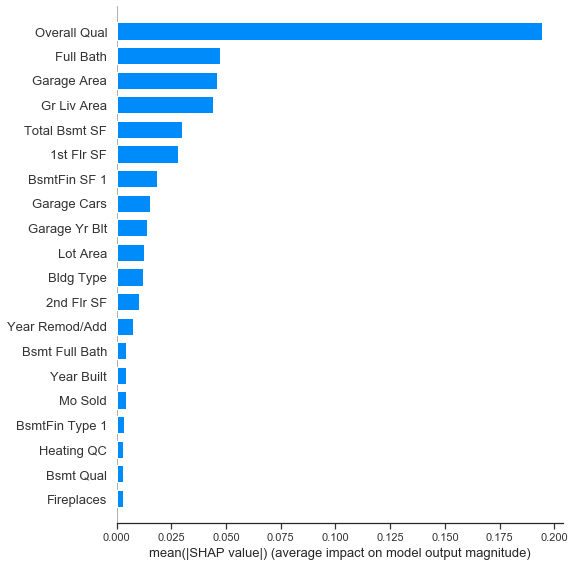

In [52]:
explainer = shap.TreeExplainer(decision_tree)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

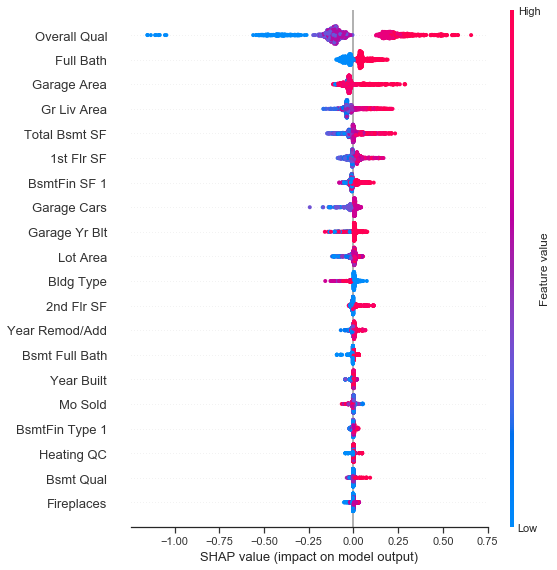

In [53]:
shap.summary_plot(shap_values, X)

In [54]:
vals = np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)

In [55]:
feature_importance

,col_name,feature_importance_vals
3,Overall Qual,0.194345
18,Full Bath,0.047163
26,Garage Area,0.045727
15,Gr Liv Area,0.044045
11,Total Bsmt SF,0.029962
...,...,...
55,Electrical,0.000000
56,Kitchen Qual,0.000000
57,Functional,0.000000
58,Fireplace Qu,0.000000


In [56]:
# feature_importance = tree.best_estimator_.feature_importances_
# 选前20个
tree_new = feature_importance.head(20)
tree_X = train_log[tree_new['col_name']]
tree_Y = train_log['SalePrice']

In [57]:
%%time
decision_tree= DecisionTreeRegressor()

tuning_parameters = {
    'min_samples_leaf': [1,5,10,20],
    'max_depth': np.arange(1,30),
}

tree = GridSearchCV(decision_tree, tuning_parameters, cv=10, return_train_score=False, scoring ='neg_mean_squared_error')
tree.fit(tree_X, tree_Y)

print('Best parameters:', tree.best_params_)

Best parameters: {'max_depth': 11, 'min_samples_leaf': 10}
Wall time: 13.1 s


In [58]:
tree_results = pd.DataFrame(tree.cv_results_)

neg_mse_tree=tree_results['mean_test_score'].max()
rmse_tree=np.sqrt(-neg_mse_tree)
print(rmse_tree)

0.17338367313321645


### Submission

In [59]:
X_test = test_log[tree_new['col_name']]
test['SalePrice']=np.exp(tree.predict(X_test)).astype(int)
submission_decision_tree=test[['Test_ID','SalePrice']]
submission_decision_tree
# submission_decision_tree.to_csv('submission_decision_tree.csv',index=False)

,Test_ID,SalePrice
0,1,155509
1,2,182946
2,3,141103
3,4,145468
4,5,118677
...,...,...
1205,1206,86790
1206,1207,204100
1207,1208,118677
1208,1209,89075


## Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

RF = RandomForestRegressor()
tuning_parameters = {
    'n_estimators': [10,100,500,1000],
    'min_samples_leaf': [1,5,10,20],
    'max_features': np.arange(1, X.shape[1]),
    'max_depth':[1,5,10,50,100]
}

rf_search = RandomizedSearchCV(RF, tuning_parameters, cv = 5, random_state=0, scoring ='neg_mean_squared_error')

rf_search.fit(X, Y)
print('Best parameters found by randomized search or RF:', rf_search.best_params_, '\n')

Best parameters found by randomized search or RF: {'n_estimators': 1000, 'min_samples_leaf': 1, 'max_features': 30, 'max_depth': 50} 



In [61]:
RF = RandomForestRegressor(n_estimators=rf_search.best_params_['n_estimators'],
                                                    min_samples_leaf=rf_search.best_params_[ 'min_samples_leaf'],
                                                    max_features =rf_search.best_params_['max_features'],
                                                    max_depth =rf_search.best_params_['max_depth'] )
RF.fit(X,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=50, max_features=30, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [62]:
rf_search.best_score_

-0.01854982226748055

In [63]:
rmse_rf=np.sqrt(-rf_search.best_score_)
print(rmse_rf)

0.13619773224059403


### Re-feature engineering 

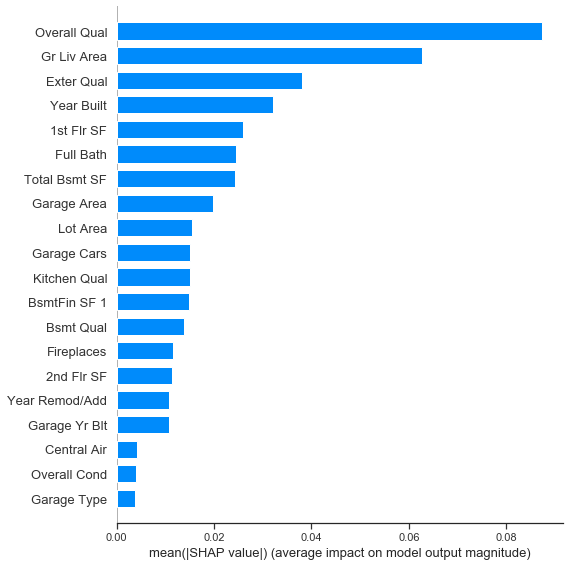

In [64]:
explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

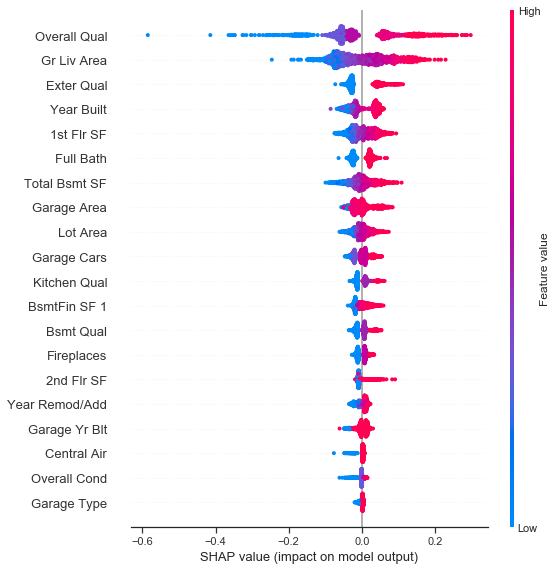

In [65]:
shap.summary_plot(shap_values, X)

In [66]:
vals= np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)

In [67]:
rf_new = feature_importance.head(10)
rf_X = train_log[rf_new['col_name']]
rf_Y = train_log['SalePrice']

In [68]:
tuning_parameters = {
    'n_estimators': [10,100,500,1000],
    'min_samples_leaf': [1,5,10,20],
    'max_features': np.arange(1, rf_X.shape[1]),
    'max_depth':[1,5,10,50,100]
}

rf_search = RandomizedSearchCV(RF, tuning_parameters, cv = 5, random_state=0, scoring ='neg_mean_squared_error')

rf_search.fit(rf_X, rf_Y)
print('Best parameters found by randomized search or RF:', rf_search.best_params_, '\n')

Best parameters found by randomized search or RF: {'n_estimators': 100, 'min_samples_leaf': 1, 'max_features': 6, 'max_depth': 10} 



In [69]:
RF = RandomForestRegressor(n_estimators=rf_search.best_params_['n_estimators'],
                                                    min_samples_leaf=rf_search.best_params_['min_samples_leaf'],
                                                    max_features =rf_search.best_params_['max_features'],
                                                    max_depth =rf_search.best_params_['max_depth'] )
RF.fit(rf_X,rf_Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [70]:
rmse_rf=np.sqrt(-rf_search.best_score_)
print(rmse_rf)

0.15010881786700173


In [71]:
X_test = test_log[rf_new['col_name']]
test['SalePrice']=np.exp(RF.predict(X_test)).astype(int)
# submission_rf=test[['Test_ID','SalePrice']]
# submission_rf.to_csv('submission_rf.csv',index=False)

## XGBoost

In [72]:
from xgboost import XGBRegressor

In [73]:
%%time
xgb_model = XGBRegressor(objective='reg:squarederror', reg_lambda=0)

tuning_parameters = {
    'learning_rate': [0.01,0.05,0.1],
    'gamma' : [0.1,0.2],
    'n_estimators' : [0,500],
    'max_depth' : [5,6],
    'subsample' : [0.5,0.6,0.8,0.9,1.0],
}

feature_to_train_xgb = train_log.drop(['SalePrice','Train_ID'], axis=1)
xgb_X = feature_to_train_xgb
xgb_Y = train_log['SalePrice']

xgb_model = RandomizedSearchCV(xgb_model, tuning_parameters, n_iter = 32, cv = 5, random_state=0, n_jobs=4, scoring ='neg_mean_squared_error')
xgb_model.fit(xgb_X, xgb_Y)

print('Best parameters found by randomised search:', xgb_model.best_params_, '\n')

Best parameters found by randomised search: {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1} 

Wall time: 1min 14s


In [81]:
xgb_model.best_score_ 

-0.01700557269625317

In [74]:
rmes_boost = np.sqrt(-xgb_model.best_score_ )
rmes_boost

0.13040541666761074

In [75]:
xgb_model = XGBRegressor(subsample=xgb_model.best_params_['subsample'],
                         n_estimators=xgb_model.best_params_['n_estimators'],
                         max_depth =xgb_model.best_params_['max_depth'],
                         learning_rate =xgb_model.best_params_['learning_rate'],
                         gamma = xgb_model.best_params_['gamma'] )
xgb_model.fit(X,Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

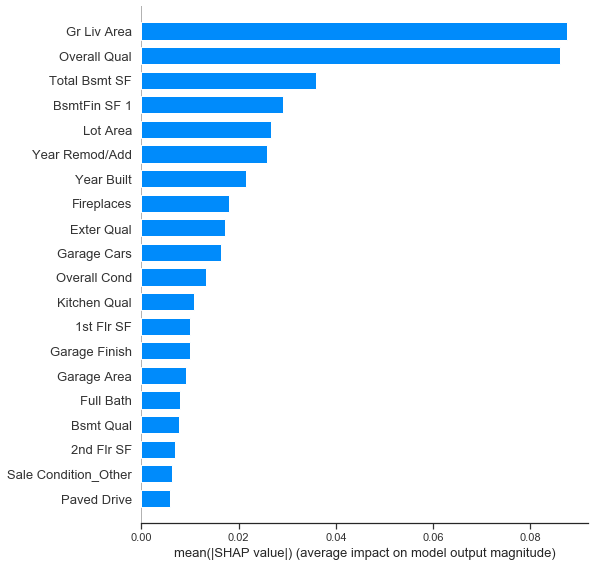

In [76]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_type="bar")

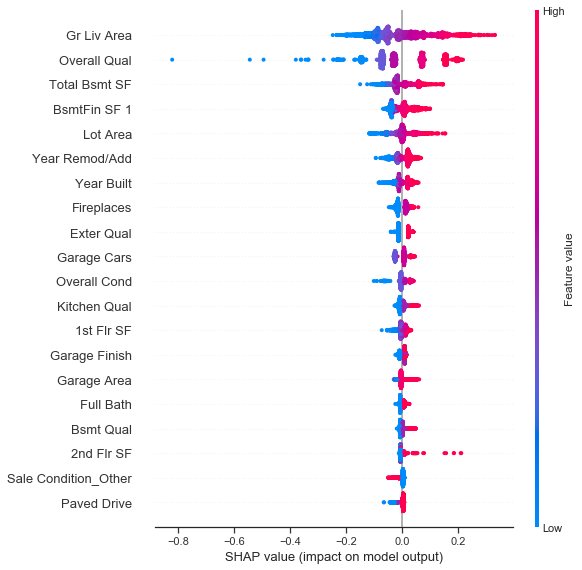

In [77]:
shap.summary_plot(shap_values, X)

In [78]:
vals = np.abs(shap_values).mean(0)
feature_importance = pd.DataFrame(list(zip(X.columns,vals)),columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],ascending=False,inplace=True)

In [79]:
X_test = test_log[xgb_X.columns.tolist()]
test['SalePrice']=np.exp(xgb_model.predict(X_test)).astype(int)
# submission_xgbst=test[['Test_ID','SalePrice']]
# submission_xgbst.to_csv('submission_xgbst.csv',index=False)

## AdaBoost

In [80]:
from sklearn.ensemble import AdaBoostRegressor

In [81]:
ADA = AdaBoostRegressor()

tuning_parameters = {
    'learning_rate': [0.01,0.05,0.1],
    'n_estimators' : [10,50,500],
}
 
ada = GridSearchCV(ADA, tuning_parameters, cv=5, return_train_score=False, scoring ='neg_mean_squared_error')
ada.fit(X, Y)

print('Best parameters found by randomised search:', ada.best_params_, '\n')

Best parameters found by randomised search: {'learning_rate': 0.1, 'n_estimators': 500} 



In [90]:
ada.best_score_

-0.027176154295391563

In [82]:
rmes_ada = np.sqrt(-ada.best_score_)
rmes_ada

0.16499615751734123

In [83]:
X_test = test_log[X.columns.values.tolist()]
test['SalePrice']=np.exp(ada.predict(X_test)).astype(int)
# submission_ada=test[['Test_ID','SalePrice']]
# submission_ada.to_csv('submission_ada.csv',index=False)

## Stacking

In [84]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold

class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
    
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [85]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso

decision_tree = DecisionTreeRegressor()
Lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state=1))
ADA = AdaBoostRegressor()
RF = RandomForestRegressor()
XGB = XGBRegressor(objective='reg:squarederror', reg_lambda=0)

stacked_averaged_models = StackingAveragedModels(base_models = (ADA, RF, decision_tree, XGB),
                                                 meta_model = Lasso)

In [86]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [87]:
X = feature_to_train
Y = train_log['SalePrice']

stacked_averaged_models.fit(X.values, Y)
stacked_train_pred = stacked_averaged_models.predict(X.values)
print(rmse(Y, stacked_train_pred)) 

0.05175735844305447


In [88]:
X_test = test_log[X.columns.values.tolist()]
test['SalePrice']=np.exp(stacked_averaged_models.predict(X_test.values)).astype(int)
# submission_staking=test[['Test_ID','SalePrice']]
# submission_staking.to_csv('submission_staking.csv',index=False)

In [91]:
vals = {'Model':['Decision Tree','Random Forest','XGBoost','AdaBoost','Stacking'],
       'RMSE':[rmse_tree,rmse_rf,rmes_boost,rmes_ada,rmse(Y, stacked_train_pred)]}

matrics = pd.DataFrame(vals).sort_values(by="RMSE", ascending=True)
matrics.reset_index(drop=True, inplace=True)
matrics

,Model,RMSE
0,Stacking,0.051757
1,XGBoost,0.130405
2,Random Forest,0.150109
3,AdaBoost,0.164996
4,Decision Tree,0.173384
